# Lending Club Case Study 

### Starting By Importing Important Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb                       
import matplotlib as mlt 
import matplotlib.pyplot as plt  
from platform import python_version 

In [3]:
# This will print the version of all the libraries being used
print ('Python version :', python_version())
print ('Numpy version : ', np.__version__)  
print ('Pandas version : ', pd.__version__)
print ('Seaborne version : ', sb.__version__)
print ('MatPlotLib version : ', mlt.__version__)

Python version : 3.8.5
Numpy version :  1.19.2
Pandas version :  1.1.3
Seaborne version :  0.11.0
MatPlotLib version :  3.3.2


### Import or Read the .csv File

In [4]:
df = pd.read_csv("loan.csv")
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

**1. First we will look at the DataFrame and it's description to get a brief idea about the data**
   - Removing emty columns
   - Removing columns with the same value
   - Remove columns that are not needed for analysis

**Since all Columns are not visible, we need to set display max columns**

In [5]:
pd.set_option('display.max_columns', 111)       # Describe the status of all columns in the dataframe
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

- In the above discription of the dataframe we can clearly see that there are numerous columns that have 'NaN' value entirly and will be of no use to us in any analysis and need to be discarded

In [6]:
df.dropna(how='all', axis=1, inplace=True)      #This will drop the columns will all null values
df.shape[1]

57

- It can be seen that on removing NaN value Columns the number of columns has now reduced from 111 to 57

In [7]:
df.std()[(df.std() == 0.0)]

collections_12_mths_ex_med    0.0
policy_code                   0.0
acc_now_delinq                0.0
chargeoff_within_12_mths      0.0
delinq_amnt                   0.0
tax_liens                     0.0
dtype: float64

- Columns with standard deviation 0.0 will have either all values as 0 or all the values as the same number and will not be able to provide us with any statistical significace and can be droped.


In [8]:
df.nunique(axis=0) # This will give the number of unique occuring unique values in every column

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

- Columns like 'url', 'desc', 'emp_title' can be droped as there are too many different type of values and will be dificult to plot


- Columns like 'pymnt_plan', 'initial_list_status', 'application_type' can be droped as tey have only one value in the entire column

In [9]:
df = df.drop(labels=None, axis=1, index=None, columns=[ 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'url', 'desc', 'emp_title','pymnt_plan', 'initial_list_status', 'application_type' ], level=None, inplace=False, errors='ignore')
df.shape[1]

45

In [10]:
df = df.dropna(thresh=df.shape[0]*0.5,how='all',axis=1)    # This will drop columns wilth more than 50% null values  
df.shape

(39717, 42)

**Removing '%' sign from the int_rate column**
- first remove % sign 
- covert into float

In [11]:
df['int_rate'] = df['int_rate'].str.replace('%','')  # This Replaces the % symbol with an empty string
df['int_rate'] = df['int_rate'].astype(float)        # This converts the datatype of the entire column to float


## Organising the variables based on our use


**It is important to consider only those variable that can be collected while the application process as only this data will be useful in creating a model to detect good and bad loan custumers while the application process.** 

**If the data generated after the Loan approval is used it will be of no use while screeing the loan applicants.**

**Important variables describing loan details**

- loan_amnt
- int_rate
- dti
- installment
- term
- grade
- sub_grade
- verification_status
- delinq_2yrs
- inq_last_6mths
- earliest_cr_line


**Variables describing customer details**

- annual_inc
- open_acc
- total_acc
- emp_length
- home_ownership
- purpose
- pub_rec
- pub_rec_bankruptcies
- addr_state
    
**-Based on our problem statement 'loan_status' will be a very important comparison variable.**
- We do not need columns of the customers who are current as we do not know weather they will pay fully or be charged of so we cannot relay on their data.

- The data in 'earliest_cr_line' cann not be used directly 
- We can form a new column with only the years data

In [12]:
df.drop(df.loc[df['loan_status']== 'Current'].index, inplace=True)   # This will drop the rows of current customers

df[['earliest_cr_line']] = df[['earliest_cr_line']].astype(str) # Converts the column into string
df['ecl_year'] = df['earliest_cr_line'].str[-2:] # Takes last two string values from the earliest_cr_line data

y = df['ecl_year'].astype(int)  # Converts ecl_year data type to integer
df['ecl_year'] = np.where(y>8, y+1900, y+2000) 
#If the year value is less than '08' we add 2000 to it to make it 1984 
# & if it is more than '08' like '84' then we add 1900 to make it 1984'



df = df[[ 'loan_status', 'loan_amnt', 'int_rate', 'dti', 'installment', 'term', 'grade', 'sub_grade', 'verification_status', 'delinq_2yrs', 'inq_last_6mths', 'ecl_year', 'annual_inc', 'open_acc', 'total_acc', 'emp_length', 'home_ownership', 'purpose', 'pub_rec', 'pub_rec_bankruptcies', 'addr_state'  ]]
# Here we created a new dataframe with on the values we need
df

,loan_status,loan_amnt,int_rate,dti,installment,term,grade,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,ecl_year,annual_inc,open_acc,total_acc,emp_length,home_ownership,purpose,pub_rec,pub_rec_bankruptcies,addr_state
0,Fully Paid,5000,10.65,27.65,162.87,36 months,B,B2,Verified,0,1,1985,24000.0,3,9,10+ years,RENT,credit_card,0,0.0,AZ
1,Charged Off,2500,15.27,1.00,59.83,60 months,C,C4,Source Verified,0,5,1999,30000.0,3,4,< 1 year,RENT,car,0,0.0,GA
2,Fully Paid,2400,15.96,8.72,84.33,36 months,C,C5,Not Verified,0,2,2001,12252.0,2,10,10+ years,RENT,small_business,0,0.0,IL
3,Fully Paid,10000,13.49,20.00,339.31,36 months,C,C1,Source Verified,0,1,1996,49200.0,10,37,10+ years,RENT,other,0,0.0,CA
5,Fully Paid,5000,7.90,11.20,156.46,36 months,A,A4,Source Verified,0,3,2004,36000.0,9,12,3 years,RENT,wedding,0,0.0,AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,Fully Paid,2500,8.07,11.33,78.42,36 months,A,A4,Not Verified,0,0,1990,110000.0,13,40,4 years,MORTGAGE,home_improvement,0,NaN,CO
39713,Fully Paid,8500,10.28,6.40,275.38,36 months,C,C1,Not Verified,1,1,1986,18000.0,6,9,3 years,RENT,credit_card,0,NaN,NC
39714,Fully Paid,5000,8.07,2.30,156.84,36 months,A,A4,Not Verified,0,0,1998,100000.0,11,20,< 1 year,MORTGAGE,debt_consolidation,0,NaN,MA
39715,Fully Paid,5000,7.43,3.72,155.38,36 months,A,A2,Not Verified,0,0,1988,200000.0,17,26,< 1 year,MORTGAGE,other,0,NaN,MD


In [13]:
df.info() # This will giv a brief info of all columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_status           38577 non-null  object 
 1   loan_amnt             38577 non-null  int64  
 2   int_rate              38577 non-null  float64
 3   dti                   38577 non-null  float64
 4   installment           38577 non-null  float64
 5   term                  38577 non-null  object 
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   verification_status   38577 non-null  object 
 9   delinq_2yrs           38577 non-null  int64  
 10  inq_last_6mths        38577 non-null  int64  
 11  ecl_year              38577 non-null  int32  
 12  annual_inc            38577 non-null  float64
 13  open_acc              38577 non-null  int64  
 14  total_acc             38577 non-null  int64  
 15  emp_length         

- We can see that there are columns like loan amt which have the data type as object which shouls be float

In [14]:
df[['loan_amnt']] = df[['loan_amnt']].astype(float) #The loan amount should be Float

In [15]:
df['verification_status'] = df['verification_status'].replace('Source Verified', 'Verified') #Converting Source verified to verified
df.verification_status.unique()

array(['Verified', 'Not Verified'], dtype=object)

df.drop(df.loc[df['loan_status']== 'Current'].index, inplace=True)   # This will drop the rows of current customers

df[['loan_amnt']] = df[['loan_amnt']].astype(float)

df[['earliest_cr_line']] = df[['earliest_cr_line']].astype(str) # Converts the column into string
df['ecl_year'] = df['earliest_cr_line'].str[-2:]   # Takes last two string values from the earliest_cr_line data
#twenty = '20'
#ninteen = '19'
#df.ecl_year = df.apply(lambda x: str(20) + str(x) if x[0] == '0' else str(19) + str(x) , axis=1)



df = df[[ 'loan_status', 'loan_amnt', 'int_rate', 'dti', 'installment', 'term', 'grade', 'sub_grade', 'verification_status', 'delinq_2yrs', 'inq_last_6mths', 'ecl_year', 'annual_inc', 'open_acc', 'total_acc', 'emp_length', 'home_ownership', 'purpose', 'pub_rec', 'pub_rec_bankruptcies', 'addr_state'  ]]
df

## Correlation

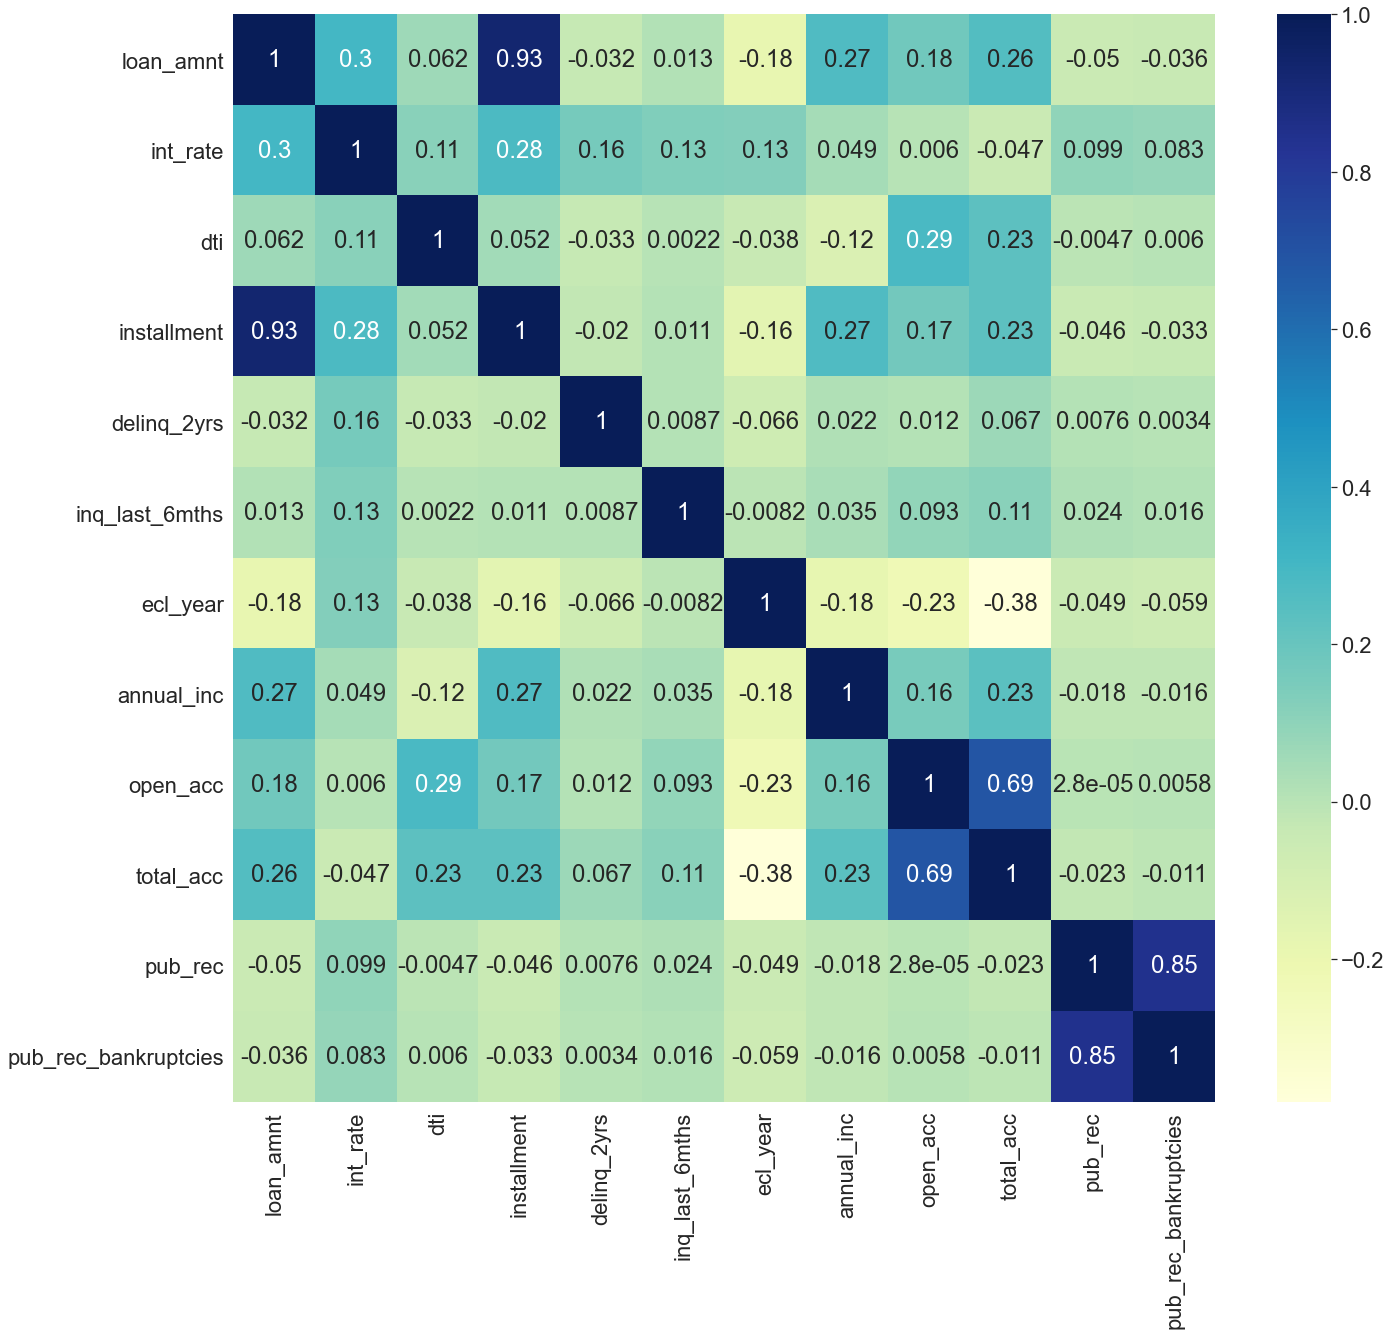

In [16]:
plt.figure(figsize=(22,20)) # Setting figure size

sb.set(font_scale = 2) #setting font size

# Plotting a heatmap
sb.heatmap(data=df.corr(), cmap='YlGnBu', annot=True)

plt.show() # For heatmap to appear

**1. loan_amnt**

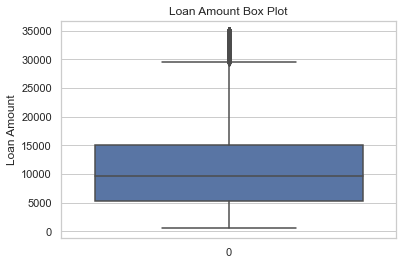

In [17]:
sb.set_theme(style="whitegrid")        # This will set the theme
sb.boxplot(data= df['loan_amnt'])      # This will plot the data

sb.set(rc = {'figure.figsize':(10,7)}) # This will set the size of the plot
sb.set(font_scale = 1)                 # This will set the font size
plt.xlabel(' ')                        # This will lable the x axis
plt.ylabel('Loan Amount')              # This will lable the x axis
plt.title('Loan Amount Box Plot')      # This will lable the plot

plt.show()

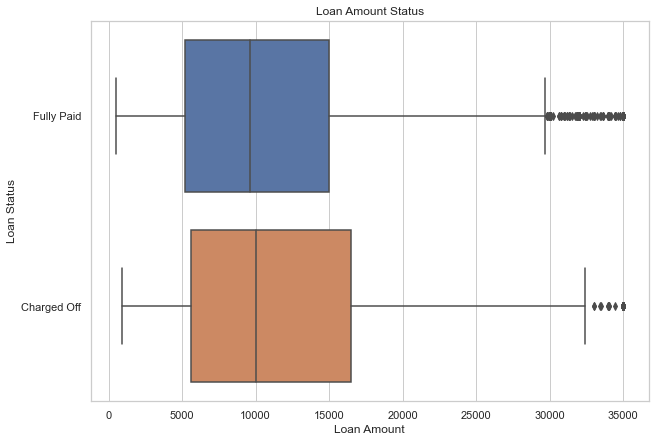

In [18]:
sb.set_theme(style="whitegrid")                  # This will set the theme
sb.boxplot(x= df['loan_amnt'], y = df['loan_status']) # This will plot the data

sb.set(rc = {'figure.figsize':(8,6)}) # This will set the size of the plot
sb.set(font_scale = 1)                 # This will set the font size
plt.xlabel('Loan Amount')                        # This will lable the x axis
plt.ylabel('Loan Status')              # This will lable the x axis
plt.title('Loan Amount Status')      # This will lable the plot

plt.show()


**2. anual_inc**

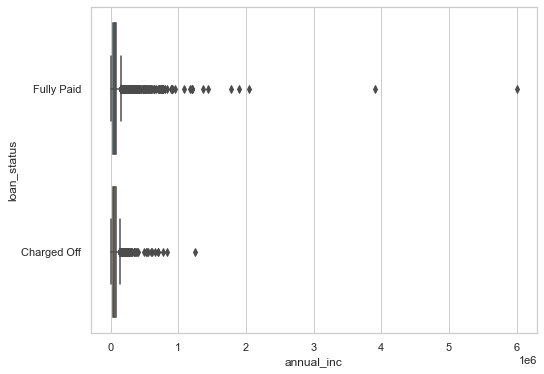

In [19]:
sb.set_theme(style="whitegrid")
sb.boxplot(x= df['annual_inc'], y = df['loan_status'])

sb.set(rc = {'figure.figsize':(22,15)})
plt.show()

- It looks like we will have to remove some outliers from the anual_inc column

In [20]:
sort_inc = np.sort(df['annual_inc'])          # Sorting the anual income data
sort_inc

Q1 = np.percentile(sort_inc, 25, interpolation = 'midpoint') # Finding 25 percentile
Q2 = np.percentile(sort_inc, 50, interpolation = 'midpoint') # Finding 50 percentile
Q3 = np.percentile(sort_inc, 75, interpolation = 'midpoint') # Finding 75 percentile
  
print('Q1 25 percentile of the annual_inc is, ', Q1)
print('Q1 50 percentile of the annual_inc is, ', Q2)
print('Q1 75 percentile of the annual_inc is, ', Q3)
  
IQR = Q3 - Q1                 # Finding inter Quartile range
print('Interquartile range is', IQR)

Q1 25 percentile of the annual_inc is,  40000.0
Q1 50 percentile of the annual_inc is,  58868.0
Q1 75 percentile of the annual_inc is,  82000.0
Interquartile range is 42000.0


In [21]:
inc_15 = sort_inc[sort_inc>150000]     # Aual income under Rs.150000
inc_16 = sort_inc[sort_inc>160000]     # Aual income under Rs.160000
inc_17 = sort_inc[sort_inc>170000]     # Aual income under Rs.170000
inc_18 = sort_inc[sort_inc>180000]     # Aual income under Rs.180000

inc_per_15 = round(inc_15.size/sort_inc.size, 3) # Percentile of income under Rs.150000
inc_per_16 = round(inc_16.size/sort_inc.size, 3) # Percentile of income under Rs.160000
inc_per_17 = round(inc_17.size/sort_inc.size, 3) # Percentile of income under Rs.170000
inc_per_18 = round(inc_18.size/sort_inc.size, 3) # Percentile of income under Rs.180000
print ('Aual income percentile under Rs.150000: ',inc_per_15)
print ('Aual income percentile under Rs.160000: ',inc_per_16)
print ('Aual income percentile under Rs.170000: ',inc_per_17)
print ('Aual income percentile under Rs.180000: ',inc_per_18)


Aual income percentile under Rs.150000:  0.039
Aual income percentile under Rs.160000:  0.032
Aual income percentile under Rs.170000:  0.027
Aual income percentile under Rs.180000:  0.022


- The interquartile range is too small and we will loose data if we use this to remove outlires. 
- Based on the Observations from the box plot there aren't many observations above Rs.1,00,000/- mark. 
- We will be droping the data of the customers with anual income of more than Rs.1,65,000/- as the size of that value amounts to 0.03 percentile of the entire data and retaining all other data.

In [22]:
df = df[df['annual_inc']< 165000] # droping data of people with more than 165000 anual income
df.shape[0]

37384

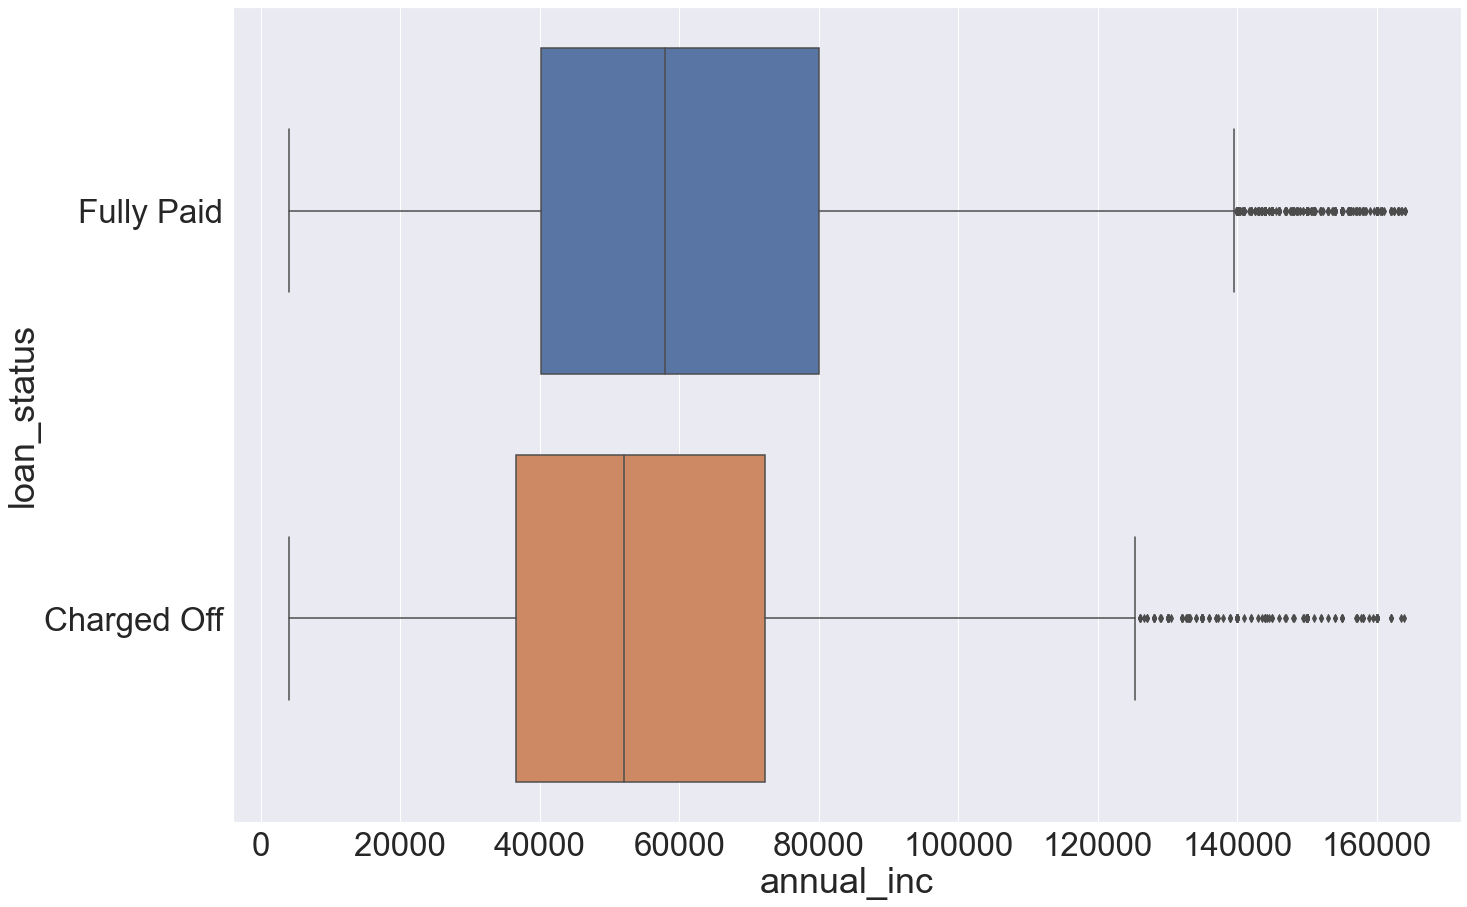

In [23]:
sb.set_theme(style="whitegrid")     # This will set the theme
sb.set(font_scale = 3)              # This will set the font size
sb.boxplot(x= df['annual_inc'], y = df['loan_status']) # This will plot the data
sb.set(rc = {'figure.figsize':(22,15)}) # this will set the fig size
plt.show()

- In the above Box Plot it can clearly be seen that the the 25th Percentile(Q1) Median and the 75th Percentile(Q3) of the income of the charged of customers is lower than that of the Fully Paid customers

**3. loan_status**

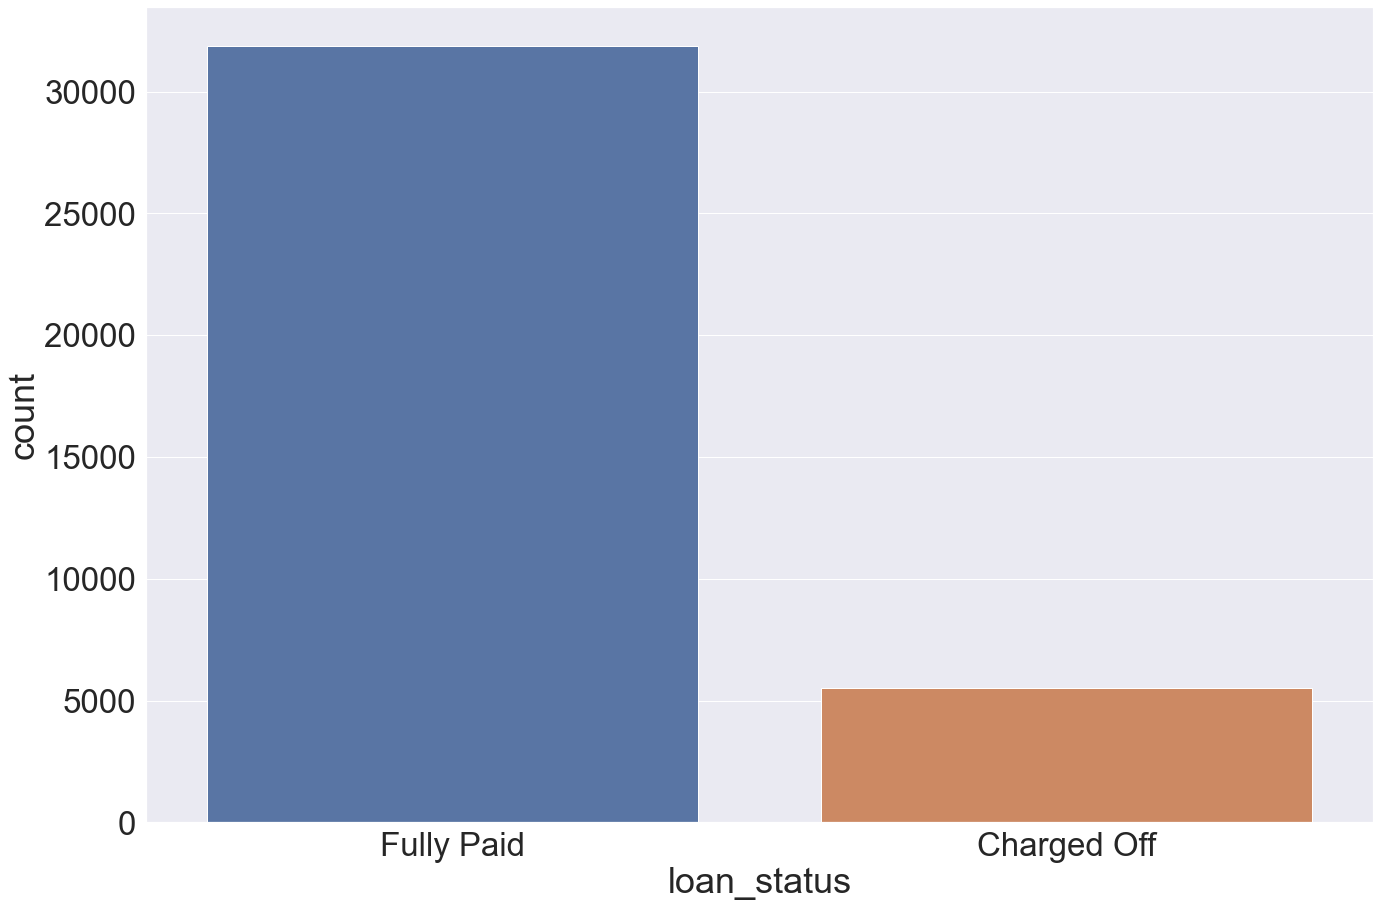

In [24]:
sb.set_theme(style="darkgrid")     # This will set the theme
sb.set(font_scale = 3)             # This will set the font size
loan_stat_plt = sb.countplot(x=df['loan_status'], data=df['loan_status'])  # This will plot the data

**4. int_rate**

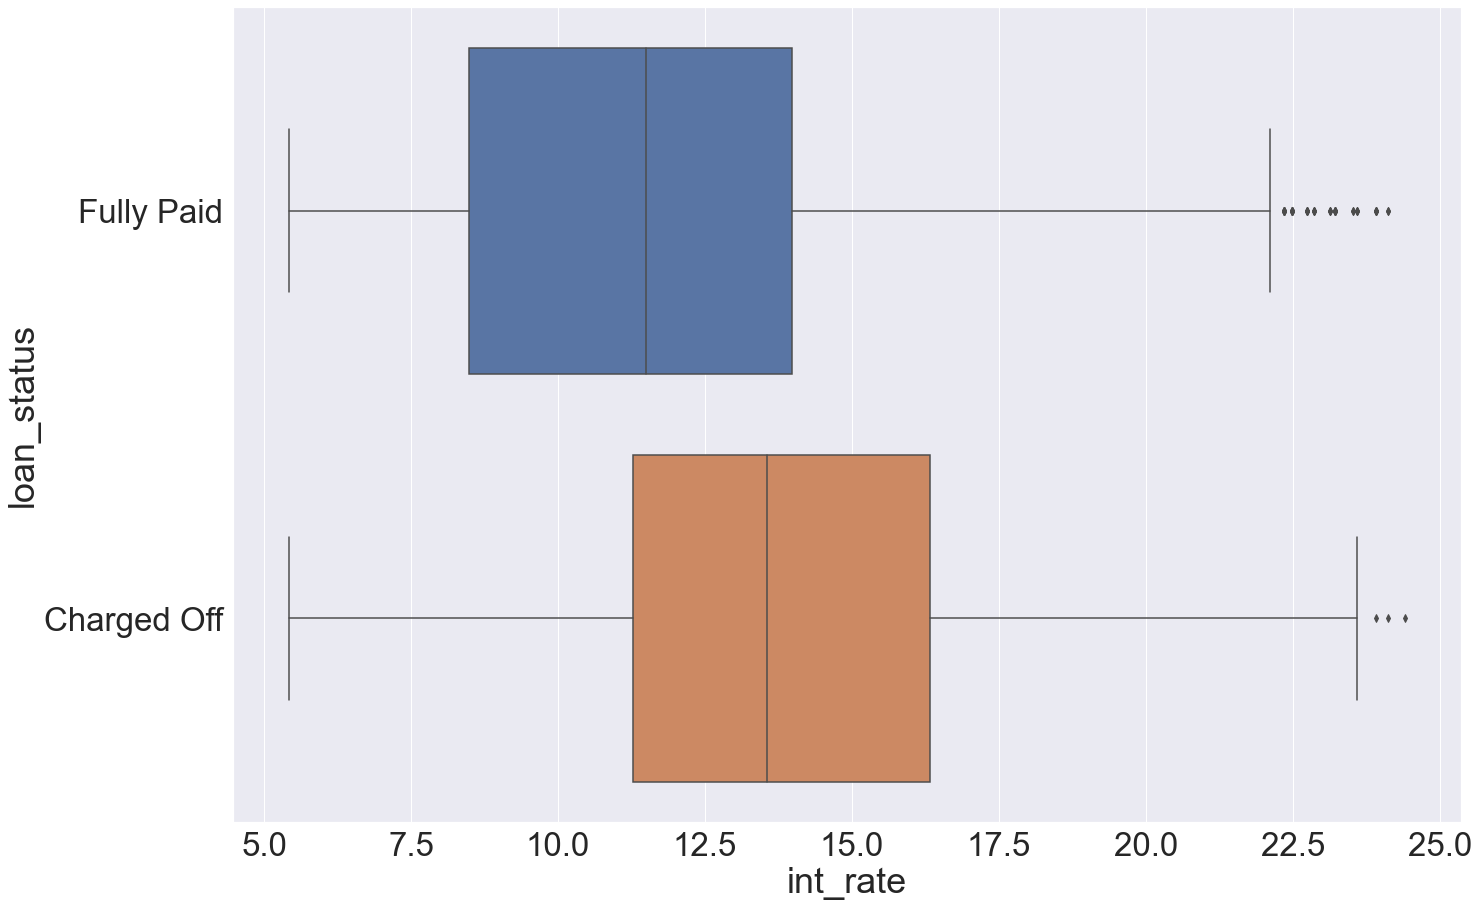

In [25]:
sb.set_theme(style="whitegrid")      # This will set the theme
sb.set(font_scale = 3)               # This will set the font size
sb.boxplot(x= df['int_rate'], y = df['loan_status'])   # This will plot the data
sb.set(rc = {'figure.figsize':(22,15)})  # This will set the fig size
plt.show()

**5. dti**

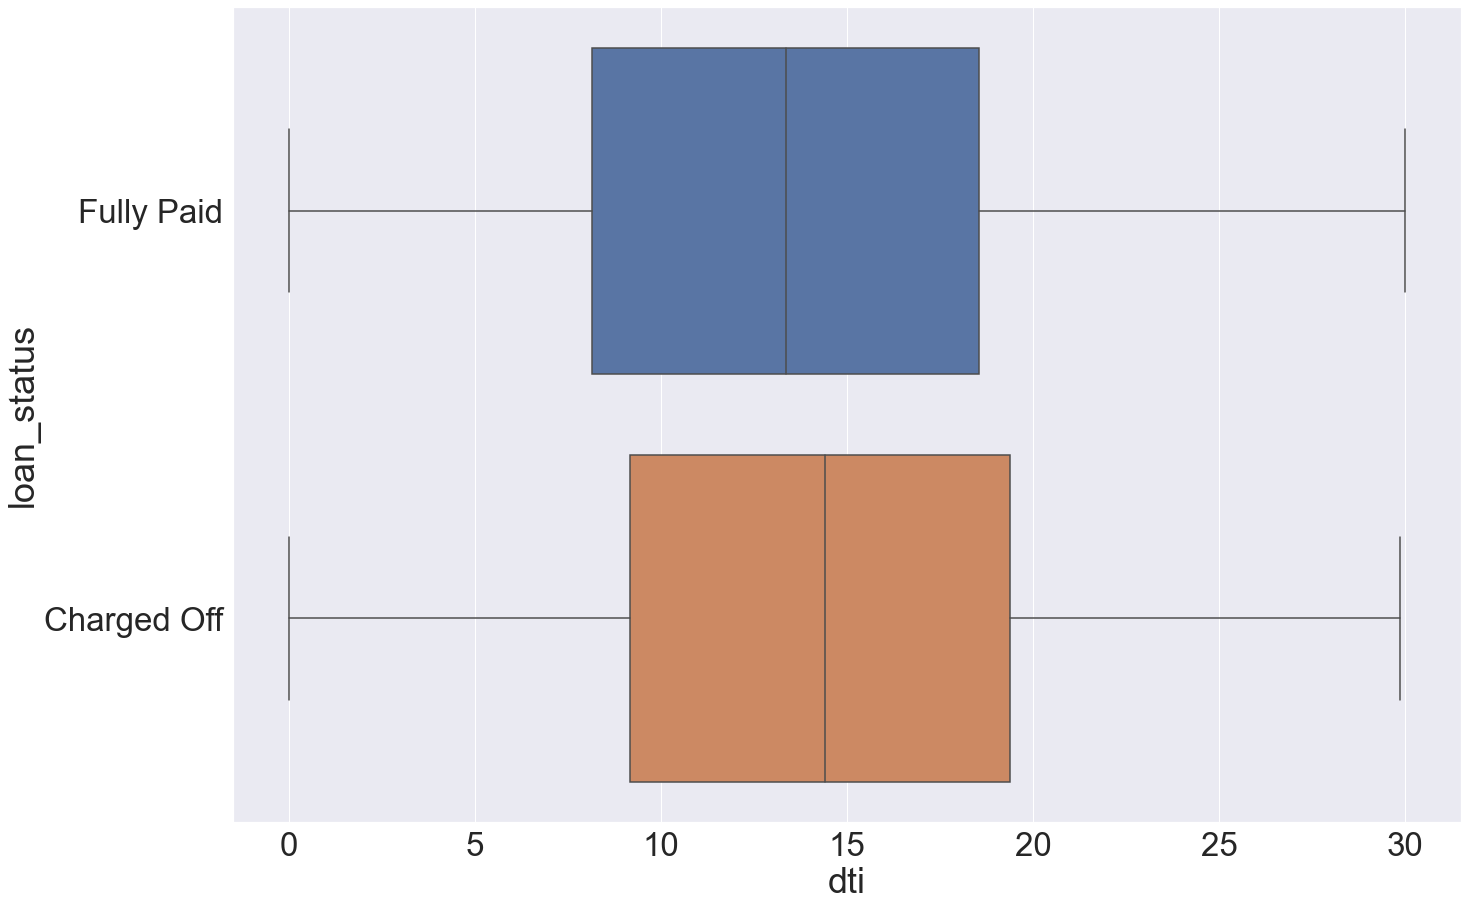

In [26]:
sb.set_theme(style="whitegrid")      # This will set the theme
sb.set(font_scale = 3)               # This will set the font size
sb.boxplot(x= df['dti'], y = df['loan_status'])   # This will plot the data
sb.set(rc = {'figure.figsize':(22,15)})  # This will set the fig size
plt.show()

In [27]:
purpose_dti_st = pd.pivot_table(df, values='dti', index=['purpose'],    
                    columns=['loan_status'], aggfunc=np.mean)         # Creating pivot table
cm = sb.light_palette("green", as_cmap=True)        # Setting Style variable to map the table

purpose_dti_st.apply(pd.to_numeric).style.background_gradient(cmap=cm)  # Setting Style of the table


loan_status,Charged Off,Fully Paid
purpose,,
car,11.861187,11.060877
credit_card,15.528321,14.574903
debt_consolidation,15.224317,14.405575
educational,11.199444,11.283650
home_improvement,12.276103,11.244944
house,11.378750,10.603862
major_purchase,11.653532,10.789758
medical,12.180095,12.352011
moving,12.457556,11.582262


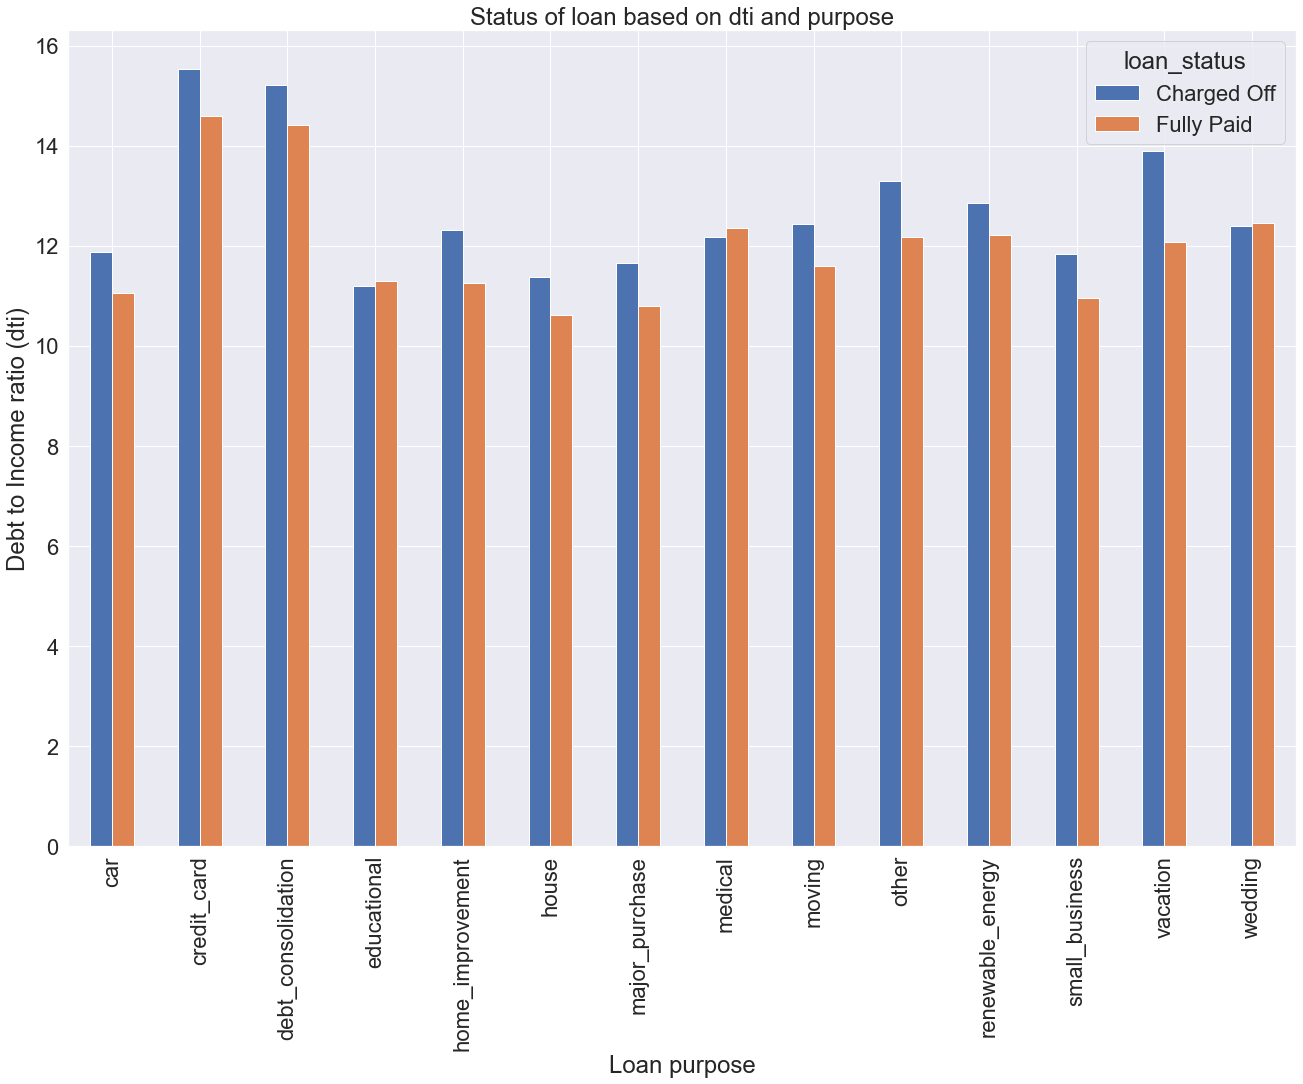

In [75]:
purpose_dti_st = pd.pivot_table(df, values='dti', index=['purpose'],    
                    columns=['loan_status'], aggfunc=np.mean)         # Creating pivot table
cm = sb.light_palette("green", as_cmap=True)        # Setting Style variable to map the table

purpose_dti_st.apply(pd.to_numeric).style.background_gradient(cmap=cm)  # Setting Style of the table



purpose_dti_st_perc = purpose_dti_st

purpose_dti_st_perc.plot(kind='bar', stacked=False, title='Loan applicants under each tenure')
plt.xlabel('Loan purpose')          # This will lable the x axis
plt.ylabel('Debt to Income ratio (dti)')          # This will lable the x axis
plt.title('Status of loan based on dti and purpose')    # This will lable the plot

plt.show()

**6. installment**

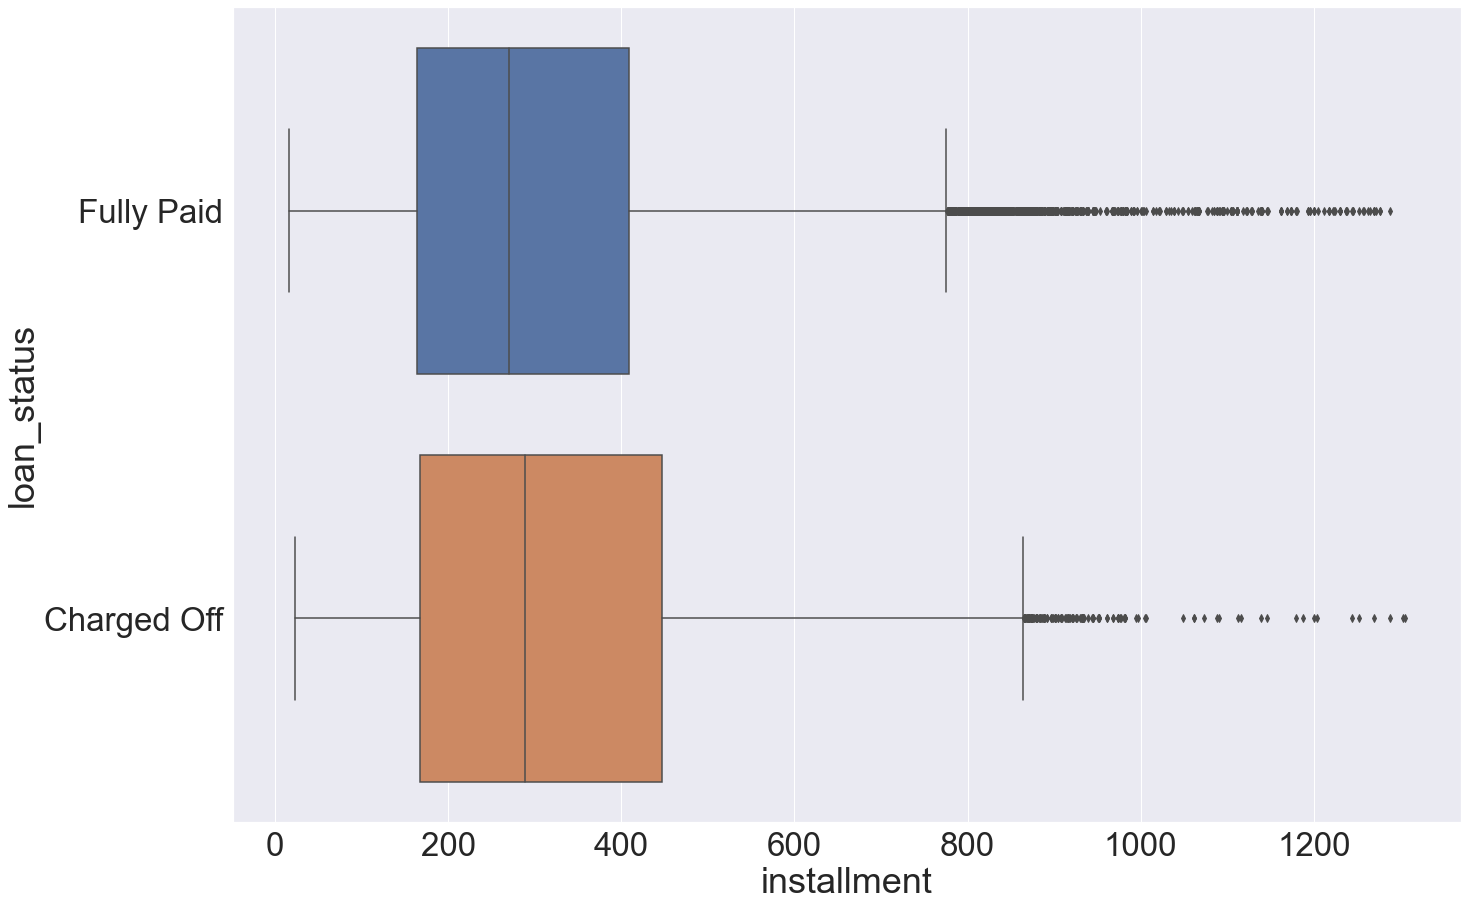

In [29]:
sb.set_theme(style="whitegrid")  # This will set the theme
sb.set(font_scale = 3)           # This will set the font size
sb.boxplot(x= df['installment'], y = df['loan_status']) # This will plot the data
sb.set(rc = {'figure.figsize':(22,15)})  # This will set the fig size
plt.show()

**7. term**

In [30]:
purpose_dti = pd.pivot_table(df, values='dti', index=['purpose'],
                    columns=['term'], aggfunc=np.median) # Creating pivot table
cm = sb.light_palette("green", as_cmap=True)    # Setting Style variable to map the table

purpose_dti.apply(pd.to_numeric).style.background_gradient(cmap=cm)  # Setting Style of the table

plt.savefig('purpose_dti.png')

<Figure size 1584x1080 with 0 Axes>

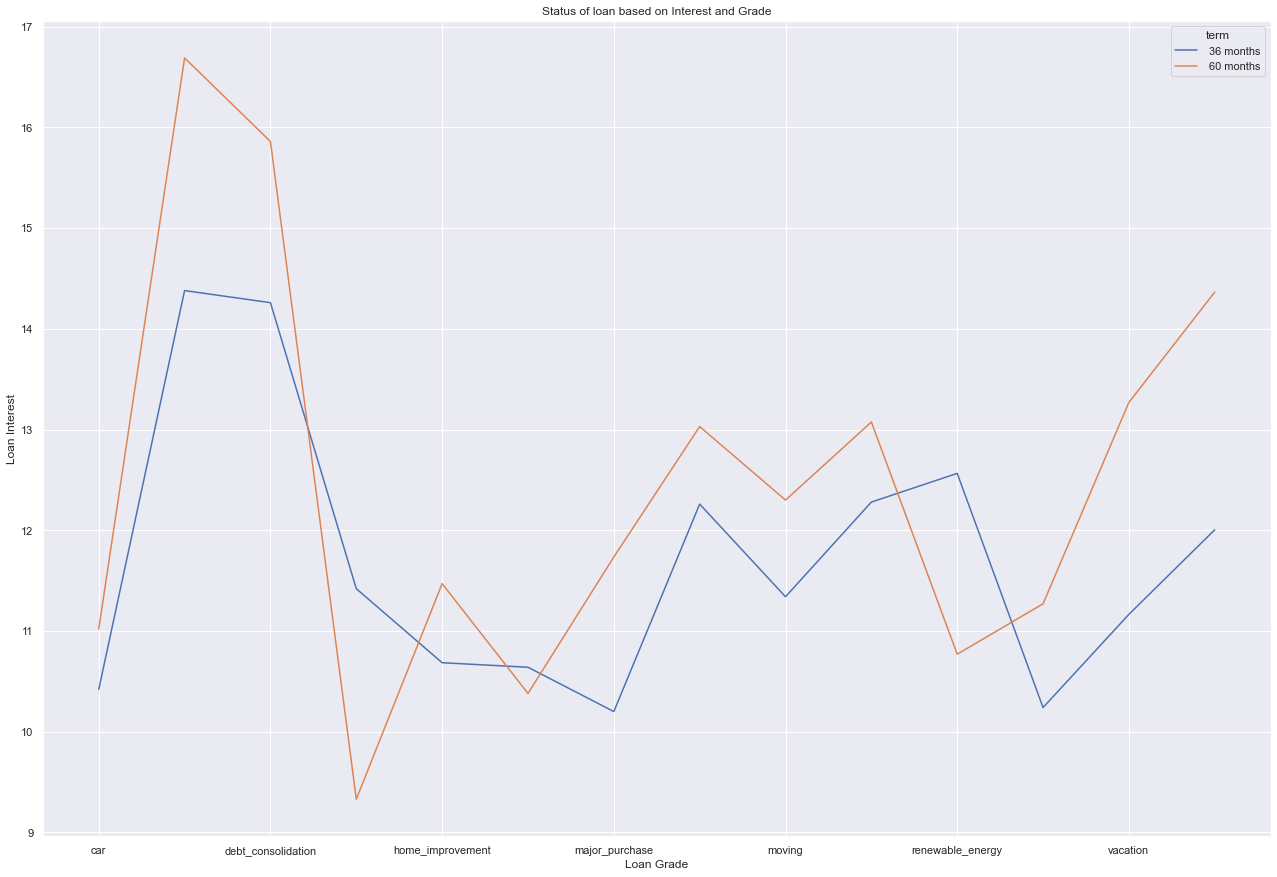

In [31]:
purpose_dti.plot.line() # Plotting the line plot of the pivot table

plt.xlabel('Loan Grade')          # This will lable the x axis
plt.ylabel('Loan Interest')          # This will lable the x axis
plt.title('Status of loan based on Interest and Grade')    # This will lable the plot

plt.show()

**8. grade**

In [32]:
grade_int = pd.pivot_table(df, values='int_rate', index=['grade'],    
                    columns=['loan_status'], aggfunc=np.mean)         # Creating pivot table
cm = sb.light_palette("green", as_cmap=True)        # Setting Style variable to map the table

grade_int.apply(pd.to_numeric).style.background_gradient(cmap=cm)  # Setting Style of the table


loan_status,Charged Off,Fully Paid
grade,,
A,7.590402,7.312967
B,11.129720,10.989488
C,13.598623,13.516469
D,15.840018,15.604453
E,17.853912,17.520092
F,20.008179,19.435286
G,21.449167,21.158242


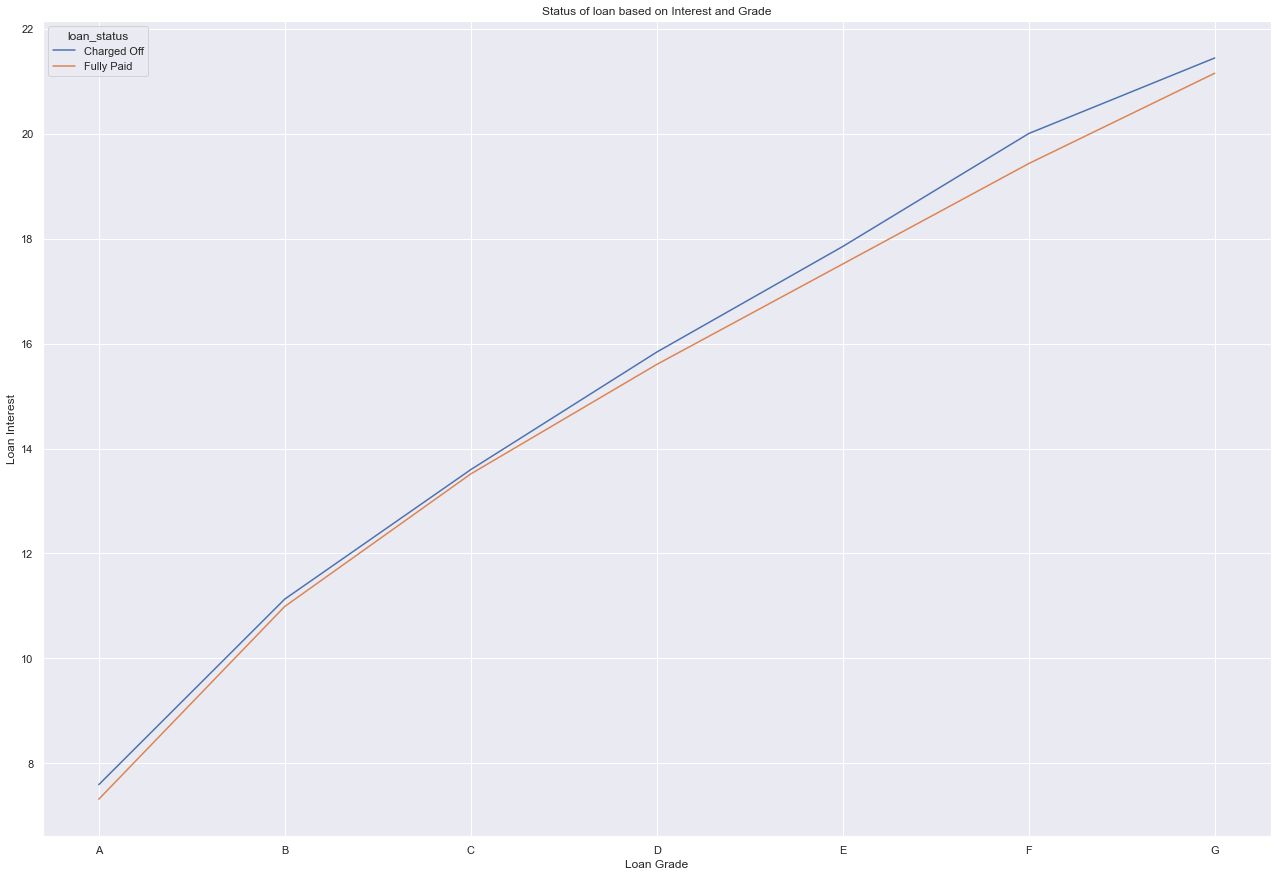

In [33]:
grade_int.plot.line() # Plotting the line plot of the pivot table

plt.xlabel('Loan Grade')          # This will lable the x axis
plt.ylabel('Loan Interest')          # This will lable the x axis
plt.title('Status of loan based on Interest and Grade')    # This will lable the plot

plt.show()


- In the above plot it can be clearly seen that in every categort the intrest paid by the charged off customer was higher than the fully paid customer in every loan grade

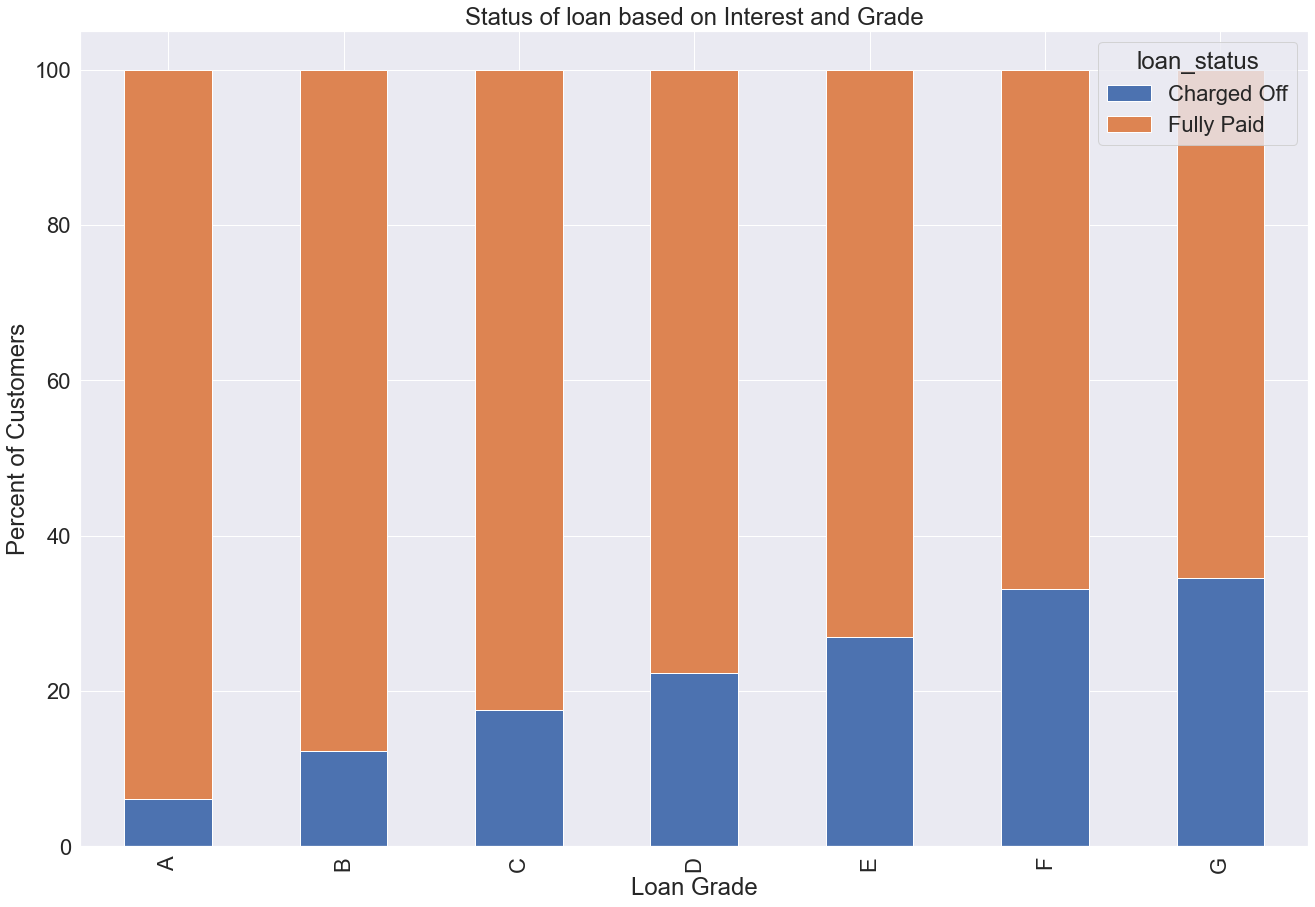

In [70]:
sb.set_theme(style="darkgrid")   # This will set the theme
sb.set(font_scale = 2)           # This will set the font size
grade_in = pd.pivot_table(df, values='int_rate', index=['grade'],    
                    columns=['loan_status'], aggfunc='count')    
grade_int_perc = grade_in.apply(lambda x: x/x.sum() * 100, axis=1)

grade_int_perc.plot(kind='bar', stacked=True, title='Loan applicants under each tenure')

plt.xlabel('Loan Grade')          # This will lable the x axis
plt.ylabel('Percent of Customers')          # This will lable the x axis
plt.title('Status of loan based on Interest and Grade')    # This will lable the plot

plt.show()


In [35]:
grade_int = pd.pivot_table(df, values='dti', index=['grade','loan_status'],
                    columns=['purpose'], aggfunc=np.mean)    # Creating pivot table
#Mean is take in the aggfunc in the above pivot table as the loan intrest depends on the grade of loan
cm = sb.light_palette("green", as_cmap=True)  # Setting Style variable to map the table

grade_int.apply(pd.to_numeric).style.background_gradient(cmap=cm)   # Setting Style of the table



**9. sub_grade**

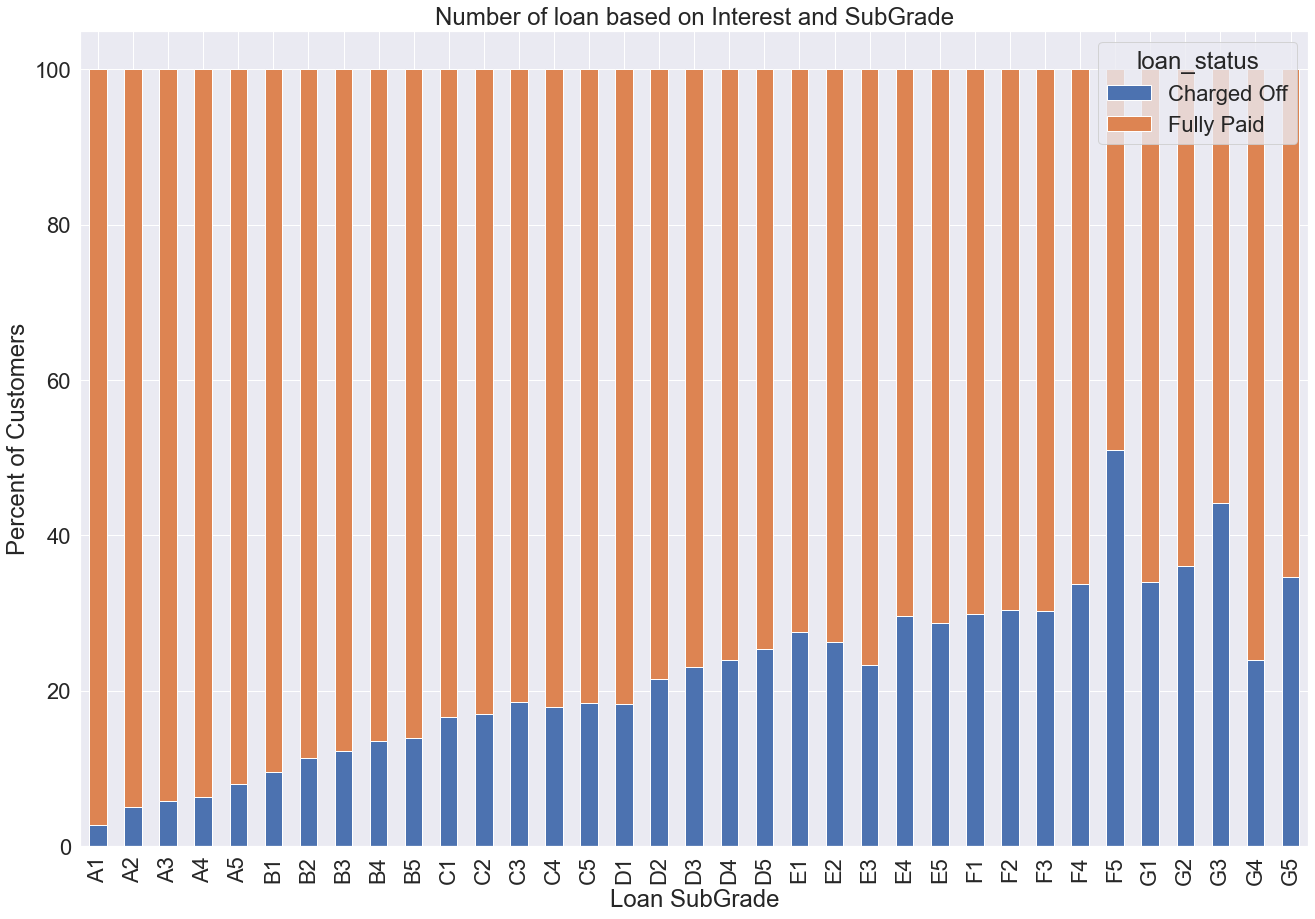

In [36]:
sub_int_count = pd.pivot_table(df, values='int_rate', index=['sub_grade'],
                    columns=['loan_status'], aggfunc='count')   # Creating pivot table


sub_int_count_perc = sub_int_count.apply(lambda x: x/x.sum() * 100, axis=1)

sub_int_count_perc.plot(kind='bar', stacked=True, title='Number of loan based on Interest and SubGrade')

plt.xlabel('Loan SubGrade')          # This will lable the x axis
plt.ylabel('Percent of Customers')          # This will lable the x axis
plt.title('Number of loan based on Interest and SubGrade')    # This will lable the plot

plt.show()


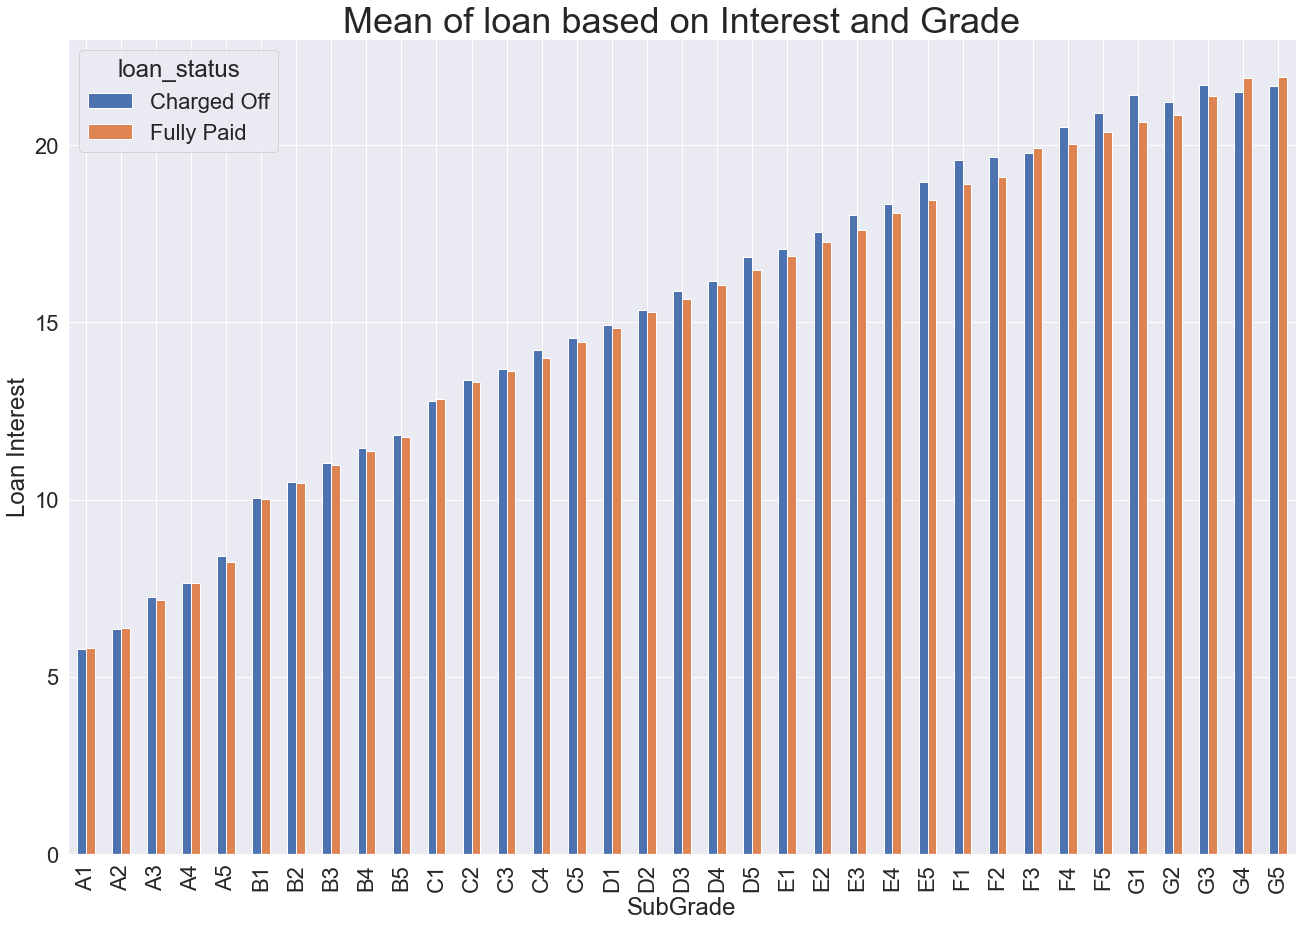

In [37]:
sub_int_mean = pd.pivot_table(df, values='int_rate', index=['sub_grade'],
                    columns=['loan_status'], aggfunc=np.mean)
# Here mean is take as the intrest rate depends on the loan grade
#cm = sb.light_palette("green", as_cmap=True)

#sub_int_mean.apply(pd.to_numeric).style.background_gradient(cmap=cm)

sub_int_mean.plot.bar()

sb.set(font_scale = 3)

plt.xlabel('SubGrade')          # This will lable the x axis
plt.ylabel('Loan Interest')          # This will lable the x axis
plt.title('Mean of loan based on Interest and Grade')    # This will lable the plot

plt.show()


**10. verification_status**

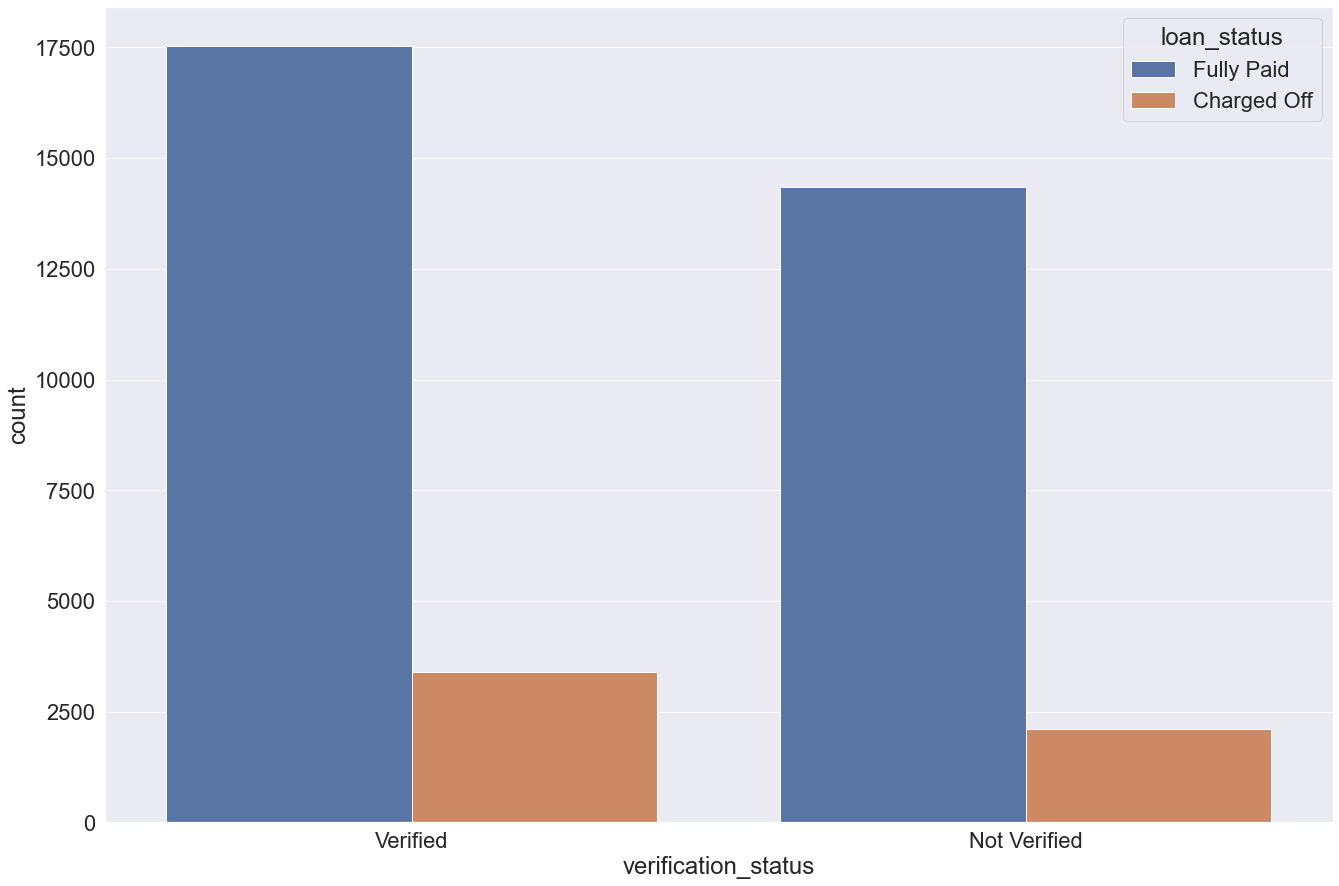

In [38]:
sb.set_theme(style="darkgrid")
sb.set(font_scale = 2)
loan_stat_plt = sb.countplot(x=df['verification_status'],  hue=df['loan_status'])



- Not much difference is seen between verified and source verified Charged off customers

**11. delinq_2yrs**

In [39]:
df = df[(df.delinq_2yrs != '9') & (df.delinq_2yrs != '11')]
del2_dti = pd.pivot_table(df, values='int_rate', index=['delinq_2yrs'],
                    columns=['loan_status'], aggfunc=np.mean)
# Here mean is take as the intrest rate depends on the loan grade
cm = sb.light_palette("green", as_cmap=True)

del2_dti.apply(pd.to_numeric).style.background_gradient(cmap=cm)


loan_status,Charged Off,Fully Paid
delinq_2yrs,,
0,13.621654,11.367133
1,14.765956,13.092756
2,15.346774,13.979125
3,14.698286,14.368623
4,16.961538,14.996889
5,16.430000,14.528889
6,20.480000,13.474444
7,18.390000,16.373333
8,18.250000,15.620000


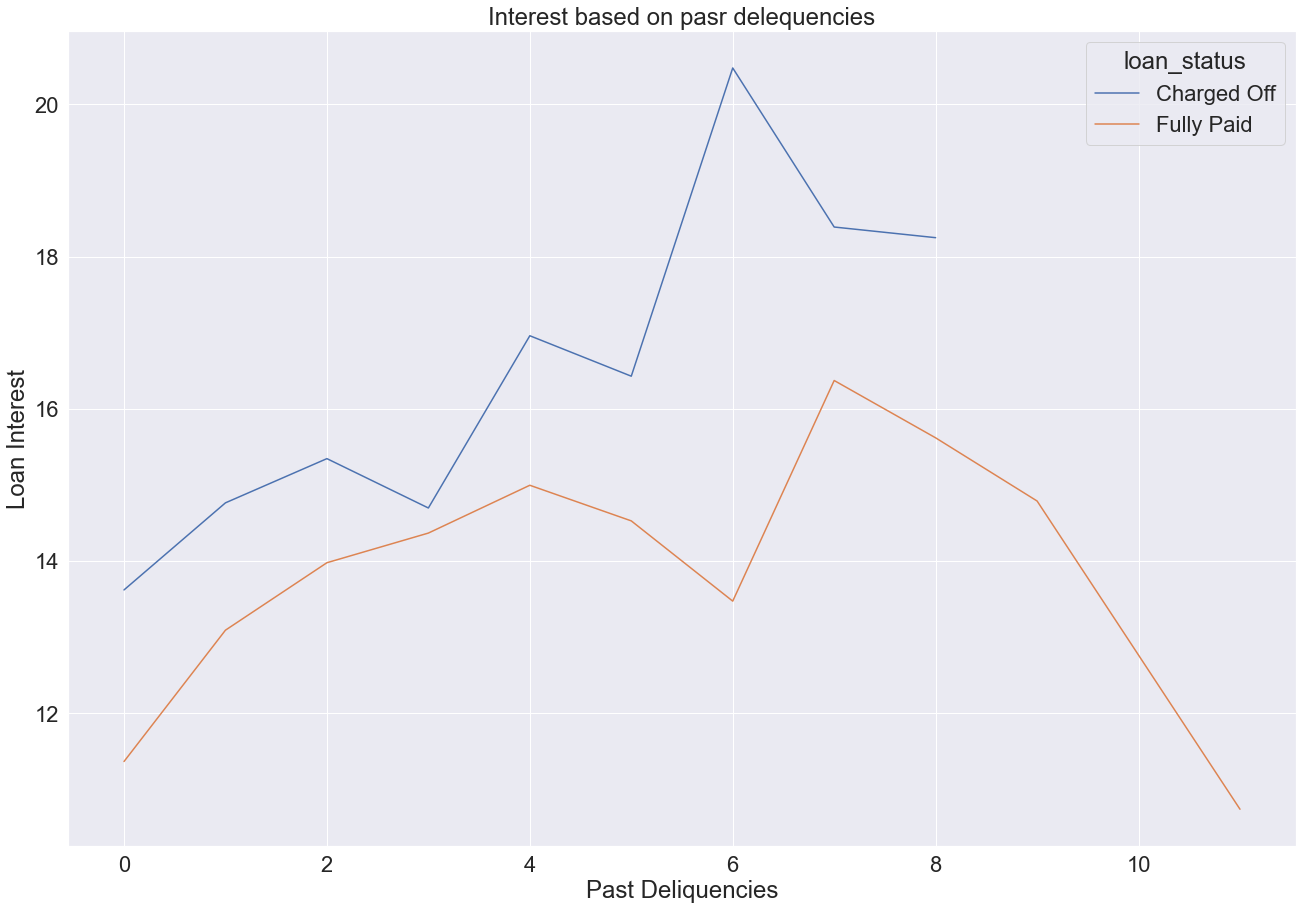

In [40]:
del2_dti.plot.line() # Plotting the line plot of the pivot table


plt.xlabel('Past Deliquencies')          # This will lable the x axis
plt.ylabel('Loan Interest')          # This will lable the x axis
plt.title('Interest based on pasr delequencies')    # This will lable the plot

plt.show()

In [41]:
df = df[df['delinq_2yrs'] < 9] # droping data of people
delinq_dti = pd.pivot_table(df, values='int_rate', index=['delinq_2yrs'],
                    columns=['loan_status'], aggfunc='count')
# Here mean is take as the intrest rate depends on the loan grade
cm = sb.light_palette("green", as_cmap=True)

delinq_dti.apply(pd.to_numeric).style.background_gradient(cmap=cm)


loan_status,Charged Off,Fully Paid
delinq_2yrs,,
0,4830,28522
1,497,2598
2,124,514
3,35,167
4,13,45
5,3,18
6,1,9
7,1,3
8,1,1


**12. inq_last_6mths**

In [42]:
inq_6 = pd.pivot_table(df, values='dti', index=['inq_last_6mths'],
                    columns=['loan_status'], aggfunc=np.median)
# Here mean is take as the intrest rate depends on the loan grade
cm = sb.light_palette("green", as_cmap=True)

inq_6.apply(pd.to_numeric).style.background_gradient(cmap=cm)

loan_status,Charged Off,Fully Paid
inq_last_6mths,,
0,14.330000,13.160000
1,14.600000,13.455000
2,14.340000,13.770000
3,14.480000,13.675000
4,11.810000,11.970000
5,10.840000,11.400000
6,14.240000,12.675000
7,11.980000,5.520000
8,6.900000,14.590000


**13. ecl_year**

In [43]:
df = df[df['ecl_year'] >= 1965] # droping data of people
ecl = pd.pivot_table(df, values='loan_amnt', index=['ecl_year'],
                    columns=['loan_status'], aggfunc='count')
# Here mean is take as the intrest rate depends on the loan grade
cm = sb.light_palette("green", as_cmap=True)

ecl.apply(pd.to_numeric).style.background_gradient(cmap=cm)


loan_status,Charged Off,Fully Paid
ecl_year,,
1965,1,5
1966,2,7
1967,5,12
1968,5,13
1969,3,32
1970,7,40
1971,5,36
1972,7,37
1973,11,45


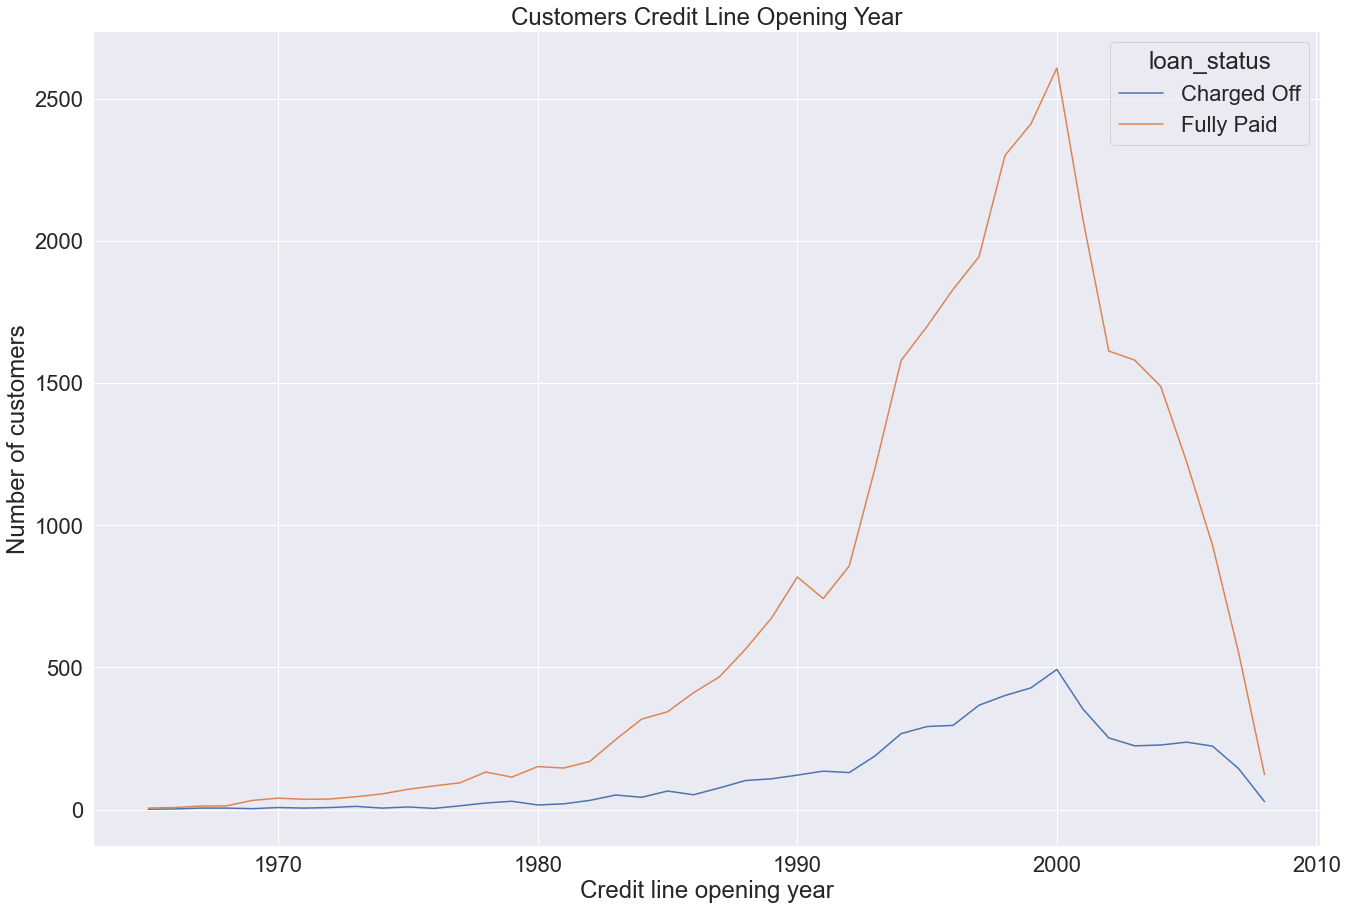

In [44]:
ecl.plot.line() # Plotting the line plot of the pivot table


plt.xlabel('Credit line opening year')          # This will lable the x axis
plt.ylabel('Number of customers')          # This will lable the x axis
plt.title('Customers Credit Line Opening Year')    # This will lable the plot

plt.show()

- People charged of after 1983 have higher dti

**14. open_acc**

In [45]:
open_ac_count = pd.pivot_table(df, values='installment', index=['open_acc'],
                    columns=['loan_status'], aggfunc='count')
# Here mean is take as the intrest rate depends on the loan grade
cm = sb.light_palette("green", as_cmap=True)

open_ac_count.apply(pd.to_numeric).style.background_gradient(cmap=cm)


loan_status,Charged Off,Fully Paid
open_acc,,
2,123.000000,467.000000
3,256.000000,1193.000000
4,356.000000,1911.000000
5,420.000000,2640.000000
6,535.000000,3233.000000
7,547.000000,3274.000000
8,540.000000,3177.000000
9,507.000000,3007.000000
10,457.000000,2533.000000


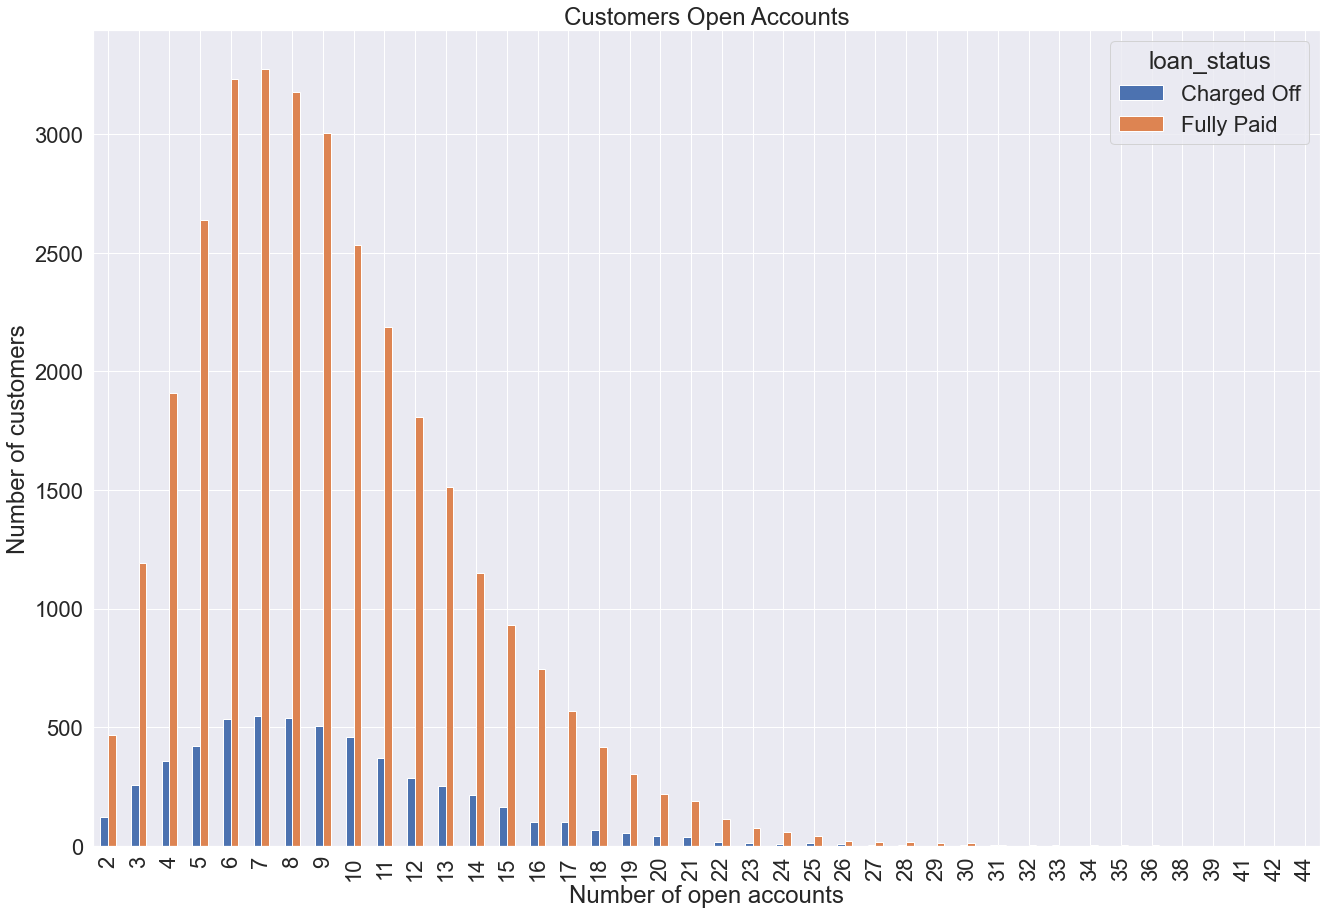

In [46]:
open_ac_count.plot.bar() # Plotting the line plot of the pivot table


plt.xlabel('Number of open accounts')          # This will lable the x axis
plt.ylabel('Number of customers')          # This will lable the x axis
plt.title('Customers Open Accounts')    # This will lable the plot

plt.show()

**15. total_acc**

In [47]:
total_ac_count = pd.pivot_table(df, values='installment', index=['total_acc'],
                    columns=['loan_status'], aggfunc='count')
# Here mean is take as the intrest rate depends on the loan grade
cm = sb.light_palette("green", as_cmap=True)

total_ac_count.apply(pd.to_numeric).style.background_gradient(cmap=cm)


loan_status,Charged Off,Fully Paid
total_acc,,
2,1.000000,2.000000
3,42.000000,137.000000
4,79.000000,335.000000
5,90.000000,452.000000
6,105.000000,562.000000
7,131.000000,677.000000
8,171.000000,809.000000
9,166.000000,879.000000
10,187.000000,971.000000


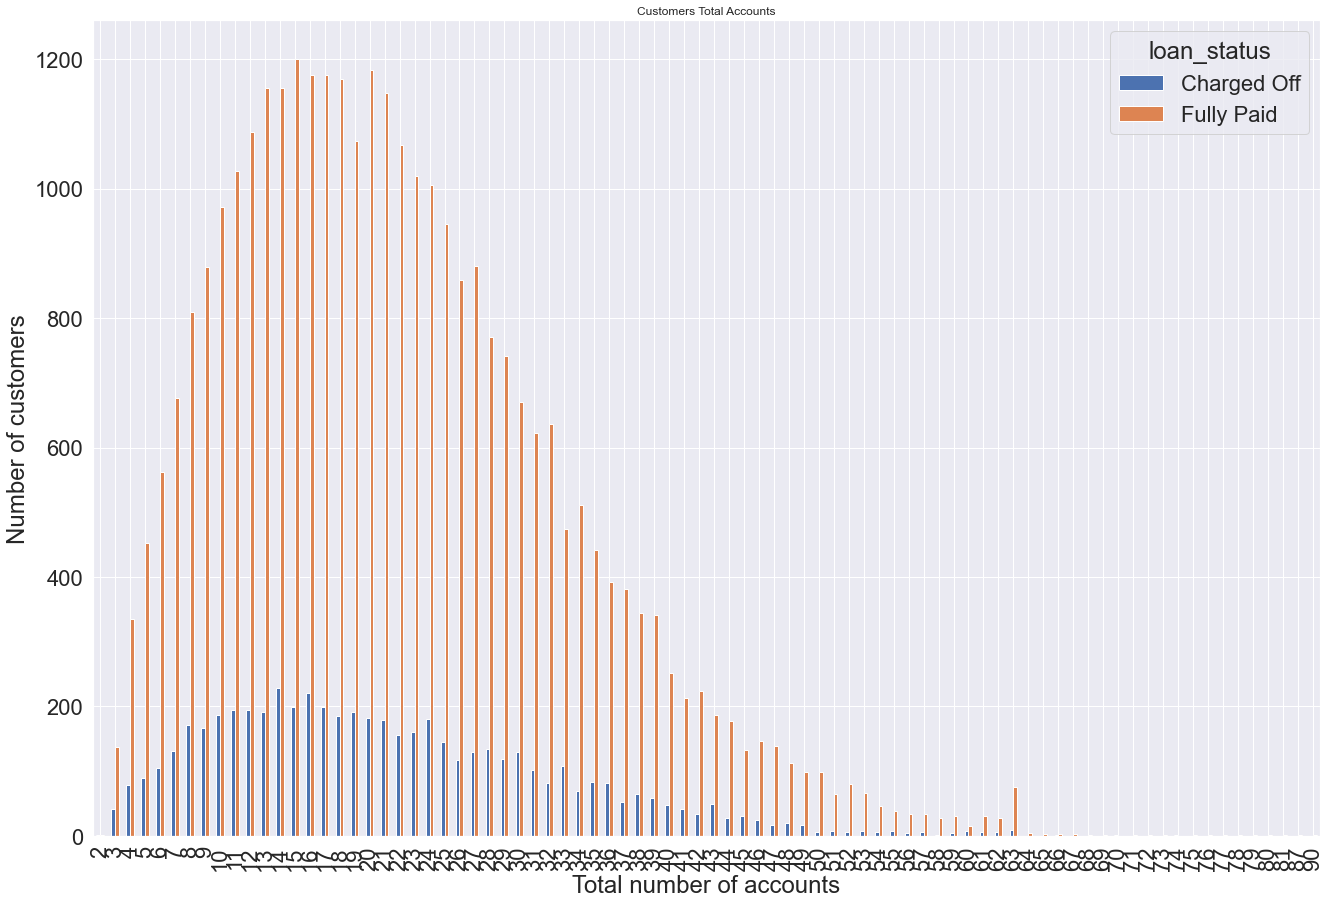

In [48]:
total_ac_count.plot.bar() # Plotting the line plot of the pivot table

sb.set(font_scale = 1)
plt.xlabel('Total number of accounts')          # This will lable the x axis
plt.ylabel('Number of customers')          # This will lable the x axis
plt.title('Customers Total Accounts')    # This will lable the plot

plt.show()

**16. emp_length**

In [49]:
emp_lng_count = pd.pivot_table(df, values='loan_amnt', index=['emp_length'],
                    columns=['loan_status'], aggfunc='count')
# Here mean is take as the intrest rate depends on the loan grade
cm = sb.light_palette("green", as_cmap=True)

emp_lng_count.apply(pd.to_numeric).style.background_gradient(cmap=cm)


loan_status,Charged Off,Fully Paid
emp_length,,
1 year,453,2640
10+ years,1293,6817
2 years,555,3604
3 years,543,3363
4 years,452,2798
5 years,445,2653
6 years,301,1806
7 years,255,1408
8 years,198,1178


In [77]:
emp_purpose_int = pd.pivot_table(df, values='int_rate', index=['emp_length', 'loan_status'],
                    columns=['purpose'], aggfunc=np.mean)
# Here mean is take as dti is already a ratio
cm = sb.light_palette("green", as_cmap=True)

emp_purpose_int.apply(pd.to_numeric).style.background_gradient(cmap=cm)


**17. home_ownership**

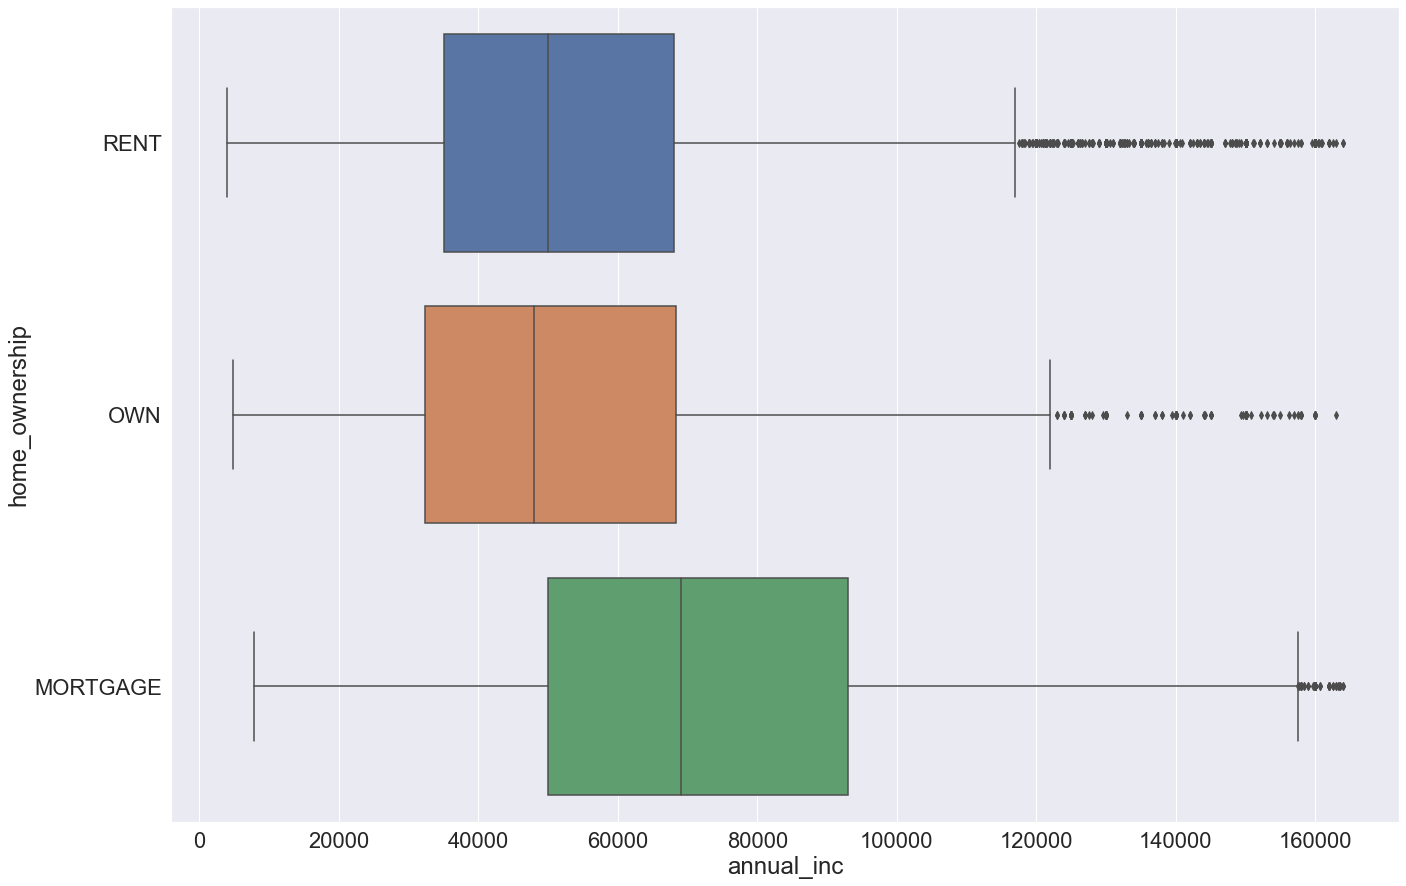

In [51]:
df = df[(df.home_ownership != 'NONE') & (df.home_ownership != 'OTHER')]

sb.set_theme(style="whitegrid")
sb.set(font_scale = 2)
sb.boxplot(x= df['annual_inc'], y = df['home_ownership'])
sb.set(rc = {'figure.figsize':(22,15)})
plt.show()

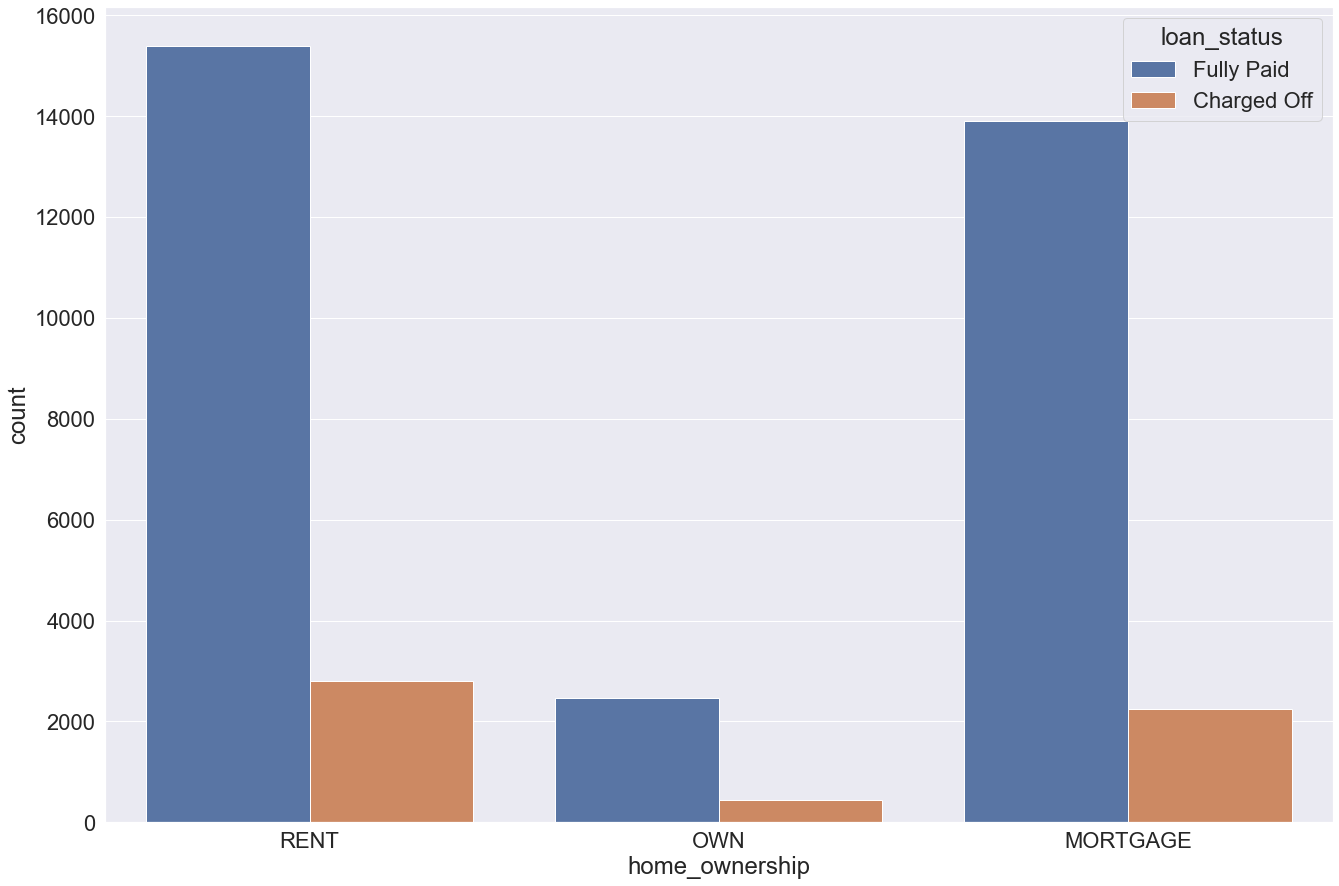

In [52]:
sb.set_theme(style="darkgrid")
sb.set(font_scale = 2)
loan_stat_plt = sb.countplot(x=df['home_ownership'],  hue=df['loan_status'])

<AxesSubplot:title={'center':'Count of Home Ownership'}, xlabel='home_ownership'>

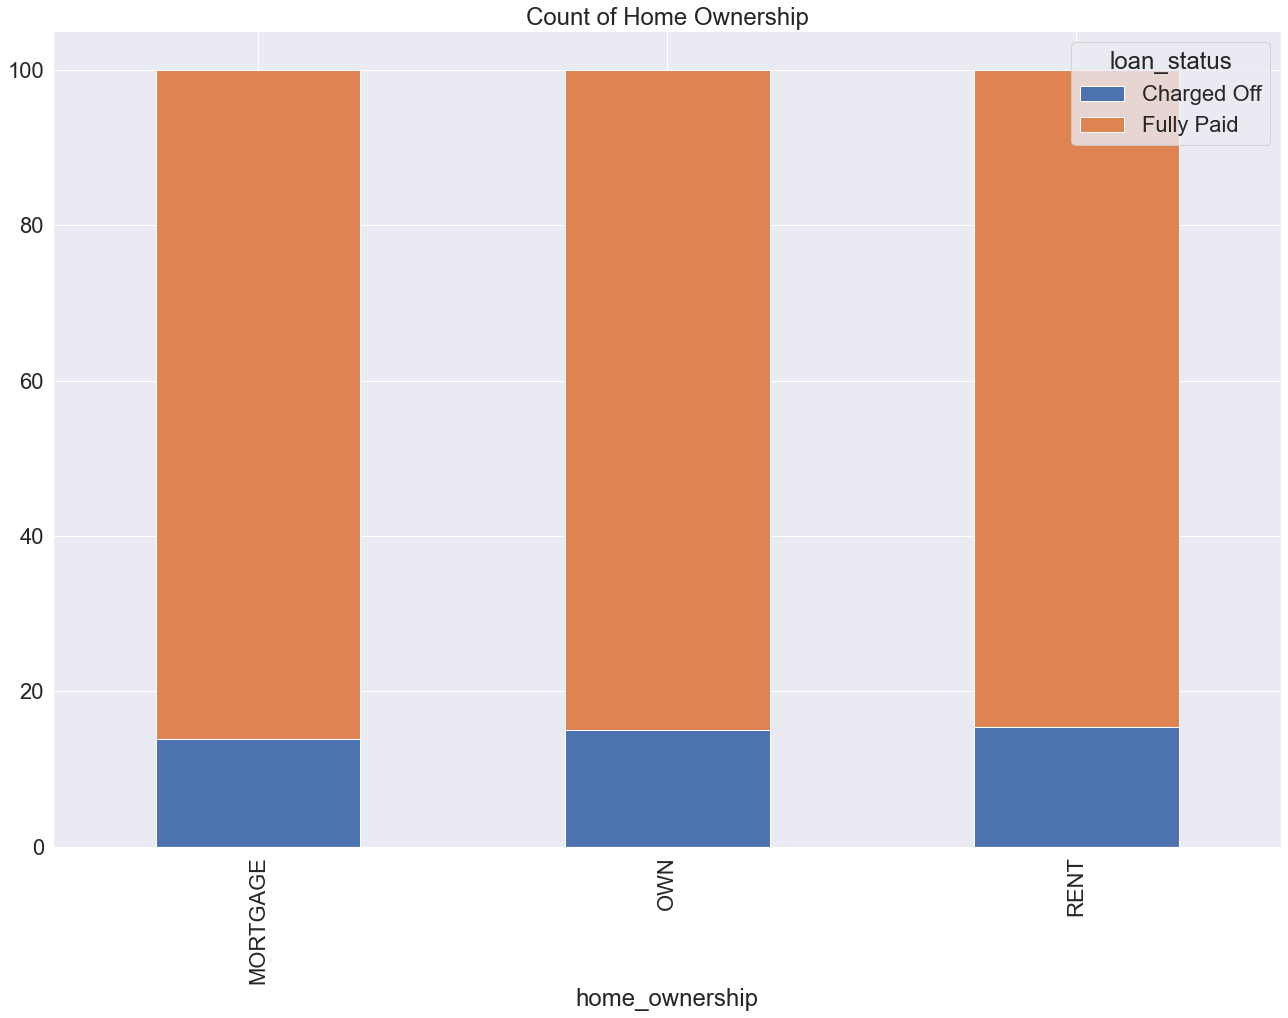

In [53]:
lstat_ho = pd.pivot_table(df, values='loan_amnt', index=['home_ownership'],
                    columns=['loan_status'], aggfunc='count')
# Here mean is take as the intrest rate depends on the loan grade
cm = sb.light_palette("green", as_cmap=True)

lstat_ho.apply(pd.to_numeric).style.background_gradient(cmap=cm)

lstat_ho_plt = lstat_ho.apply(lambda x: x/x.sum() * 100, axis=1)

lstat_ho_plt.plot(kind='bar', stacked=True, title='Count of Home Ownership')


In [84]:
ho_purpose_mean = pd.pivot_table(df, values='dti', index=['purpose'],
                    columns=['home_ownership','loan_status'], aggfunc=np.mean)
# Here mean is take as dti is already a ratio
cm = sb.light_palette("green", as_cmap=True)


ho_purpose_mean.apply(pd.to_numeric).style.background_gradient(cmap=cm)

- People with rent and motgage have a higher chance of 

**18. purpose**

In [55]:
purpose_mean = pd.pivot_table(df, values='int_rate', index=['purpose'],
                    columns=['loan_status'], aggfunc=np.mean)
# Here mean is take as the intrest rate depends on the loan grade
cm = sb.light_palette("green", as_cmap=True)

purpose_mean.apply(pd.to_numeric).style.background_gradient(cmap=cm)


loan_status,Charged Off,Fully Paid
purpose,,
car,12.371824,10.268753
credit_card,13.397822,11.370669
debt_consolidation,14.245726,12.016676
educational,12.772407,11.446500
home_improvement,13.265805,10.922668
house,15.248036,11.544671
major_purchase,12.818761,10.539030
medical,13.348095,11.059053
moving,12.264831,11.324131


Text(0.5, 0, 'Purpose of Loan')

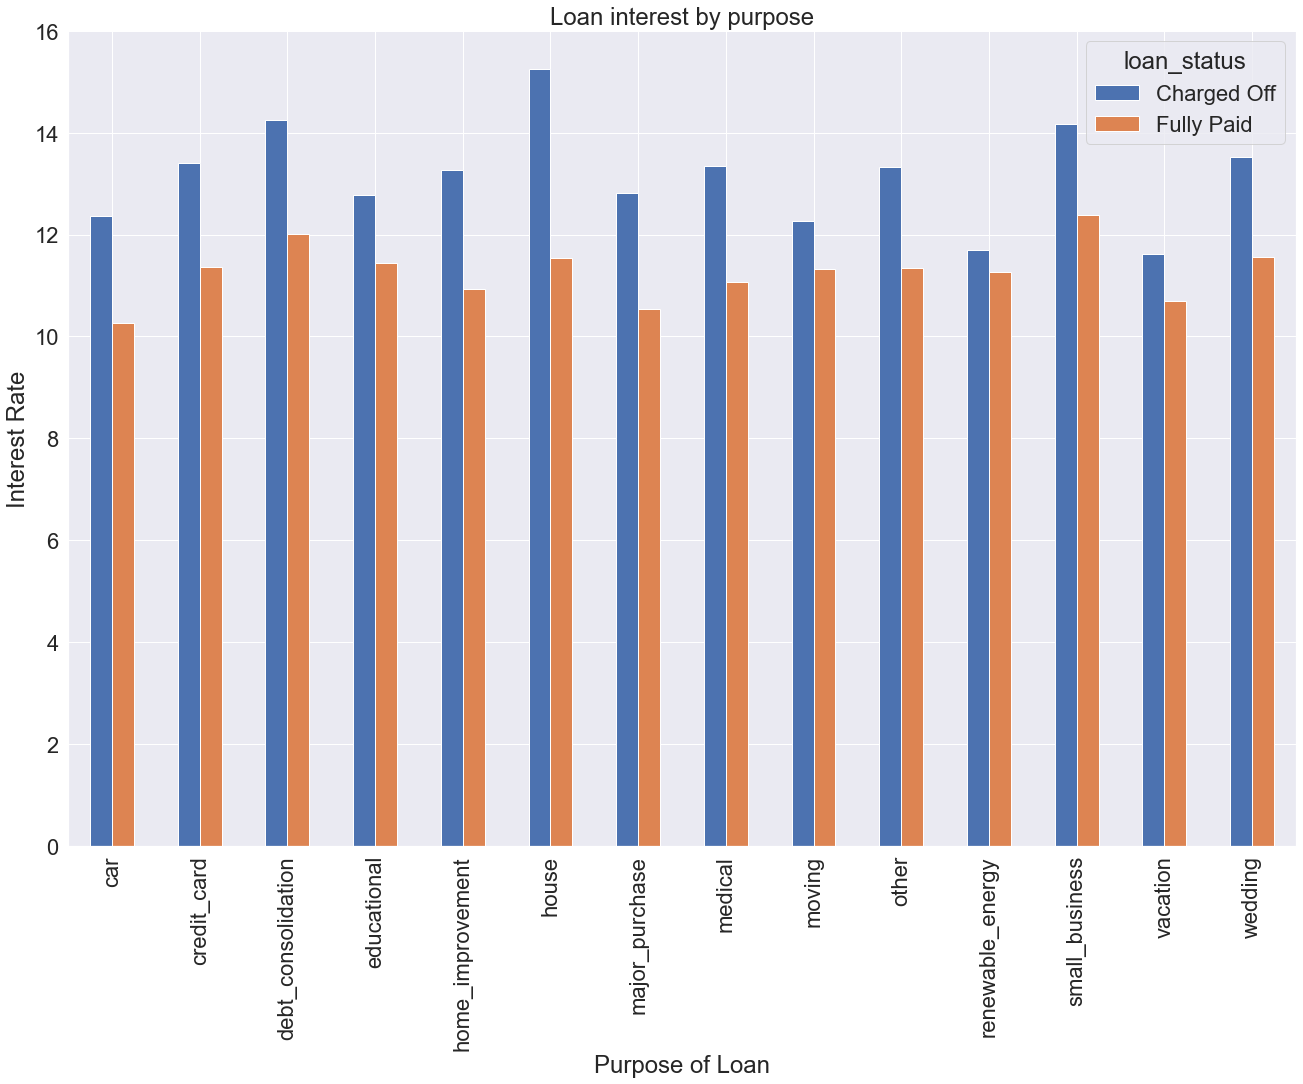

In [56]:
purpose_mean.plot(kind='bar', 
                  stacked=False, 
                  title='Loan interest by purpose') # Plotting the line plot of the pivot table

plt.ylabel('Interest Rate')
plt.xlabel('Purpose of Loan')

**19. pub_rec**

In [57]:
table_purpose_mean = pd.pivot_table(df, values='loan_amnt', index=['pub_rec'],
                    columns=['loan_status'], aggfunc='count')
# Here mean is take as the intrest rate depends on the loan grade
cm = sb.light_palette("green", as_cmap=True)

table_purpose_mean.apply(pd.to_numeric).style.background_gradient(cmap=cm)


loan_status,Charged Off,Fully Paid
pub_rec,,
0,5028.000000,30202.000000
1,447.000000,1527.000000
2,10.000000,35.000000
3,nan,6.000000
4,nan,2.000000


**20. pub_rec_bankruptcies**

In [58]:
bankrupt_count = pd.pivot_table(df, values='loan_amnt', index=['pub_rec_bankruptcies'],
                    columns=['loan_status'], aggfunc='count')
# Here mean is take as the intrest rate depends on the loan grade
cm = sb.light_palette("green", as_cmap=True)

bankrupt_count.apply(pd.to_numeric).style.background_gradient(cmap=cm)


loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0.0,5009,29971
1.0,359,1248
2.0,2,3


In [59]:
bankrupt_mean = pd.pivot_table(df, values='dti', index=['pub_rec_bankruptcies'],
                    columns=['loan_status'], aggfunc=np.mean)
# Here mean is take as the intrest rate depends on the loan grade
cm = sb.light_palette("green", as_cmap=True)

bankrupt_mean.apply(pd.to_numeric).style.background_gradient(cmap=cm)


loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0.0,14.091214,13.328471
1.0,14.622396,13.307364
2.0,13.665000,13.630000


**21. addr_state**

In [60]:
df = df[(df.addr_state != 'IA') & (df.addr_state != 'IN') & (df.addr_state != 'ME')]
st_int = pd.pivot_table(df, values='loan_amnt', index=['addr_state'],
                    columns=['loan_status'], aggfunc='count', dropna=True)

cm = sb.light_palette("green", as_cmap=True)

st_int.sort_values(by=['Charged Off', 'Fully Paid'], 
                          ascending=False, 
                          inplace=True)

st_int.apply(pd.to_numeric).style.background_gradient(cmap=cm)



loan_status,Charged Off,Fully Paid
addr_state,,
CA,1092,5602
FL,488,2205
NY,478,3066
TX,304,2234
NJ,272,1434
GA,212,1108
IL,193,1233
PA,177,1257
VA,174,1151


Text(0.5, 0, 'State Code')

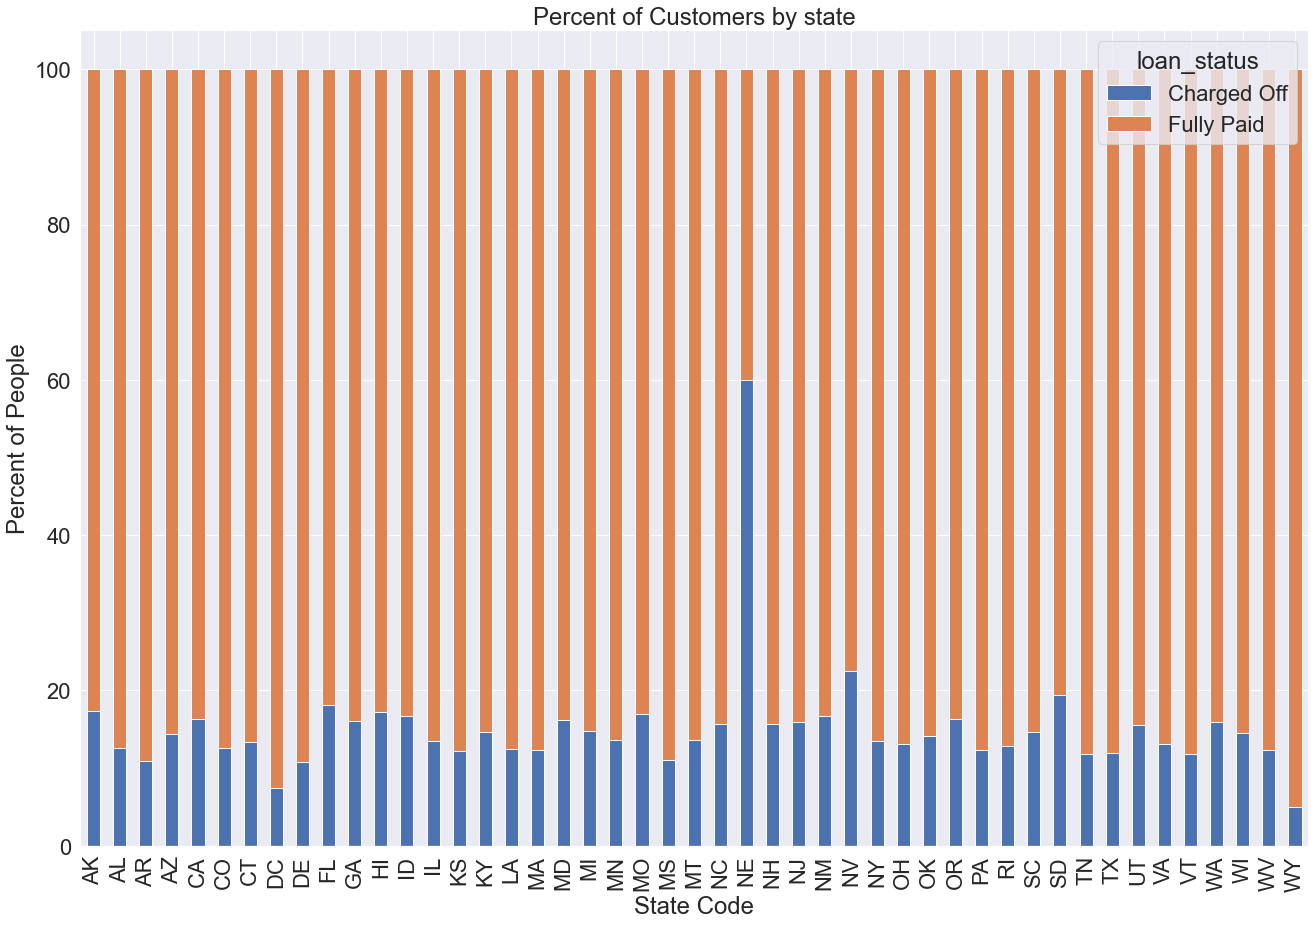

In [88]:
st_int = pd.pivot_table(df, values='loan_amnt', index=['addr_state'],
                    columns=['loan_status'], aggfunc='count', dropna=True)



st_int_perc = st_int[['Charged Off', 'Fully Paid']].apply(lambda x: 100*x/x.sum(), axis=1)
st_int_perc.plot(kind="bar", stacked=True, title='Percent of Customers by state' )

plt.ylabel('Percent of People')
plt.xlabel('State Code')